# Topic Modelling using LDA (Gensim Library)

## Description
Here, we have implemented several classes to make the process of topic modelling easier:
- Bookshelf: It consists several book object (from class Book). Bookshelf enable managing one or multiple book and transforming their contents into dictionary and pandas dataframe format.
- Book: It consistent of processed information of a book. A book has a name, a reference to text file containing the textual contents, and some additional metadata such as how to trim the unwanted text from start and end of the textual content, how to divide it into parts (based on starting sentence or heading of each part) and finally how identify the paragraphs - here default is just by splitting based on tab '\t', having a certain a minimum threshold of word counts.
- Processor: It's a class that orchestrate a series of preprocessing steps. This can be configured to make a suitable pipline.
- LDAModel: LDA model a wrapper class Gensim that take a pandas dataframe format from bookshelf, perform preprocessing, plot c_v and u_mass measures to help you find optimum number for number of topics and finally create topics and label the dominant topic and the percentage of contribution of the dominant topic for each paragraph
- Sentiment: is a class with several functions that takes a paragraph and derive the sentiment results from flair. 
- BookVis: This class combines the results of LDA model and sentiment model with the hierarchy captured in Bookshelf: shelf > books > parts > paragraphs and create several plots in each level.
## Dependencies
- pandas
- gensim
- matplotlib
- seaborn
- pyLDAvis
- flair
- spacy (run: 'python -m spacy download en_core_web_md' after installation)
- wordcloud

## Setup

Loading the custom classes and other dependencies

In [1]:
# dependencies
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_md")

# custom classes
from book import BookShelf
from lda import LDAModel
from sentiment import Sentiment
from vis import Vis

## Bookshelf
Creating a default bookshelf containing the five books - note that you can add books to bookshelf if you want it is needed in the future. Just check the implementation of the bookshelf and how the five books are already added there.

Process:
1. reading the books in bookshelf and creatign the trimmed version, finding parts and paragraphs in each part.
2. creating the dataframe for a selected book or all of them


In [2]:
bookshelf = BookShelf.read_menopause_books()

INFO:root:Bookshelf: - start checking the book files
INFO:root:		text are trimmed - Hormone Repair Manual
INFO:root:		10 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 1157

INFO:root:	Hormone Repair Manual is preprocessed...
INFO:root:		text are trimmed - Next Level
INFO:root:		19 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 981

INFO:root:	Next Level is preprocessed...
INFO:root:		text are trimmed - Queen Menopause
INFO:root:		12 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 924

INFO:root:	Queen Menopause is preprocessed...
INFO:root:		text are trimmed - The Menopause Manifesto
INFO:root:		30 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 1214

INFO:root:	The Menopause Manifesto is preprocessed...
INFO:root:		text are trimmed - Menopausing
INFO:root:		15 parts are ide

In [3]:
all_book_df = bookshelf.create_corpus_df()  # create a dataframe for all the books in the bookshelf

In [4]:
all_book_df.head()  # showing first five records

,book,chapter,paragraph_number,paragraph
0,Hormone Repair Manual,1,1,Hormone revolution:\n\n\n\n\n\nwhy everything ...
1,Hormone Repair Manual,1,2,This book is about both the process of perimen...
2,Hormone Repair Manual,1,3,"First, understand that symptoms (if you experi..."
3,Hormone Repair Manual,1,4,"Next, understand that perimenopause is not jus..."
4,Hormone Repair Manual,1,5,"Finally, know that perimenopause and the early..."


## LDA Model

Process:

1. Creating a LDAModel object and passing the dataframe of books into it. 
2. Preprocessing the text in the paragraphs
3. Creating a bag-of-word representation 
4. Checking the coherence measures to find optimum numbers of topics
5. Creating the LDA model using optimum number of topics
6. Label the paragraphs based on dominant topic and its precentage of contributions 

In [5]:
lda_model = LDAModel(all_book_df)

In [6]:
custom_stopwords = ['women', 'woman', 'menopause', "it's", 'something', "you're", 'same', "i'm", 
                   'too', 'then', 'those', 'still', 'including', 'include', 'no', "''", "i've", "don't", "doesn't",
                   "isn't", "can't", "didn't", "said", "i'd", "final", "doing", "give", "gave", "through", "put",
                   "got", "get", "sure", "d", "g", "b", "s", "we'll"]
lda_model.preprocess(custom_stopwords)  # potential arguments should be discuss here

INFO:root:Preprocessor initiated...
INFO:root:	All paragraph are normalized by removing unwanted characters
INFO:root:	tokenization and initial preprocessing is done
INFO:root:	word count is done:
INFO:root:		{'hormone': 519, 'why': 317, 'is': 5857, 'different': 272, 'after': 589, 'up': 896, 'this': 1922, 'book': 232, "it's": 1381, 'because': 1021, 'you': 4686, 'feel': 666, 'that': 5110, 'something': 299, 'with': 3641, 'your': 3808, 'body': 887, 'and': 13100, 'life': 480, "you're": 533, 'not': 2005, 'things': 271, 'by': 1137, 'or': 3284, 'early': 205, 'more': 1593, 'brain': 445, 'it': 3693, 'can': 2826, 'all': 1101, 'at': 1552, 'the': 15722, 'same': 327, 'time': 770, 'change': 230, 'a': 9203, 'but': 2021, 'called': 273, 'perimenopause': 448, 'which': 1158, 'two': 398, 'to': 11257, 'years': 654, 'before': 462, 'periods': 343, 'from': 1446, 'menopause': 2279, 'one': 982, 'year': 198, 'period': 347, 'about': 1438, 'both': 287, 'of': 10018, 'could': 511, 'than': 776, 'four': 155, 'what': 1

preprocessing workflow started...


INFO:gensim.models.phrases:collected 181377 token types (unigram + bigrams) from a corpus of 410105 words and 5460 sentences
INFO:gensim.models.phrases:merged Phrases<181377 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:Phrases lifecycle event {'msg': 'built Phrases<181377 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.34s', 'datetime': '2023-06-11T13:19:22.920708', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 184101 token types (unigram + bigrams) from a corpus of 401215 words and 5460 sentences
INFO:gensim.models.phrases:merged Phrases<184101 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:Phrases lifecycle event {'

In [7]:
lda_model.create_bow_model() # potential arguments should be discuss here

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<4772 unique tokens: ['begins', 'changing', 'event', 'everything', 'forties']...> from 5460 documents (total 124164 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<4772 unique tokens: ['begins', 'changing', 'event', 'everything', 'forties']...> from 5460 documents (total 124164 corpus positions)", 'datetime': '2023-06-11T13:19:24.531643', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.corpora.dictionary:discarding 772 tokens: [('revolution', 5), ('teen', 5), ("''i", 4), ('rita', 4), ('detect', 5), ('mosconi', 4), ('neurosteroid', 5), ('conjugated', 4), ('permission', 5), ('sonia', 4)]...
INFO:gensim.corpora.dictionary:keeping 4000 tokens which were in no less than 5 and no more than 1092000 (=20000.0%) 

INFO:gensim.models.ldamodel:using symmetric alpha at 1.0
INFO:gensim.models.ldamodel:using symmetric eta at 1.0
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 1 topics, 10 passes over the supplied corpus of 5460 documents, updating every 16000 documents, evaluating every ~5460 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (1.000): 0.002*"longer" + 0.002*"effect" + 0.002*"natural" + 0.002*"osteoporosis" + 0.002*"supp

INFO:gensim.models.ldamodel:topic diff=0.000004, rho=0.280276
INFO:gensim.models.ldamodel:-7.921 per-word bound, 242.3 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=1, decay=0.5, chunksize=2000> in 4.51s', 'datetime': '2023-06-11T13:19:29.112711', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5533 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.5
INFO:gensim.models.ldamodel:using symmetric eta at 

INFO:gensim.models.ldamodel:topic diff=0.098955, rho=0.320585
INFO:gensim.models.ldamodel:-7.879 per-word bound, 235.4 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.003*"talk" + 0.003*"i'd" + 0.002*"bit" + 0.002*"said" + 0.002*"hard" + 0.002*"put" + 0.002*"yourself" + 0.002*"thing" + 0.002*"thought" + 0.002*"got"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.003*"estradiol" + 0.003*"osteoporosis" + 0.003*"effect" + 0.003*"supplements" + 0.003*"products" + 0.002*"associated" + 0.002*"natural" + 0.002*"conditions" + 0.002*"effective" +

INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.003*"talk" + 0.002*"put" + 0.002*"said" + 0.002*"come" + 0.002*"yourself" + 0.002*"support" + 0.002*"remember" + 0.002*"hard" + 0.002*"sometimes" + 0.002*"looking"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.002*"d" + 0.002*"effect" + 0.002*"natural" + 0.002*"associated" + 0.002*"products" + 0.002*"conditions" + 0.002*"works" + 0.002*"iron" + 0.002*"inflammation" + 0.002*"magnesium"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.003*"osteoporosis" + 0.003*"uterus" + 0.002*"ovaries" + 0.002*"longer" + 0.002*"year" + 0.002*"testosterone" + 0.002*"estradiol" + 0.002*"needed" + 0.002*"possible" + 0.002*"data"
INFO:gensim.models.ldamodel:topic diff=0.142556, rho=0.385472
INFO:gensim.models.lda

INFO:gensim.models.ldamodel:topic diff=0.100465, rho=0.280276
INFO:gensim.models.ldamodel:-7.858 per-word bound, 232.1 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=3, decay=0.5, chunksize=2000> in 11.02s', 'datetime': '2023-06-11T13:19:53.275988', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5533 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta a

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.003*"sugar" + 0.003*"natural" + 0.003*"effect" + 0.003*"alcohol" + 0.003*"products" + 0.003*"medications" + 0.003*"effective" + 0.003*"grams" + 0.003*"estradiol" + 0.002*"normal"
INFO:gensim.models.ldamodel:topic diff=0.180602, rho=0.359675
INFO:gensim.models.ldamodel:-8.025 per-word bound, 260.5 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.004*"talk" + 0.003*"i'd" + 0.003*"said" + 0.003*"yourself" + 0.003*"put" + 0.003*"bit" + 0.003*"thing" + 0.003*"come" + 0.003*"hard" + 0.003*"remembe

INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 5460 documents, updating every 16000 documents, evaluating every ~5460 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.002*"improve" + 0.002*"eat" + 0.002*"come" + 0.002*"hard" + 0.002*"talk" + 0.002*"re

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.005*"depression" + 0.005*"estradiol" + 0.003*"related" + 0.003*"final" + 0.003*"conditions" + 0.003*"associated" + 0.003*"last" + 0.003*"year" + 0.003*"fibroids" + 0.003*"word"
INFO:gensim.models.ldamodel:topic diff=0.213691, rho=0.359675
INFO:gensim.models.ldamodel:-8.088 per-word bound, 272.2 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.004*"talk" + 0.003*"said" + 0.003*"yourself" + 0.003*"i'd" + 0.003*"put" + 0.003*"come" + 0.003*"bit" + 0.003*"thing" + 0.003*"got" + 0.003*"own"
INFO:

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.007*"depression" + 0.007*"estradiol" + 0.005*"conditions" + 0.005*"final" + 0.005*"related" + 0.004*"associated" + 0.003*"uterus" + 0.003*"fibroids" + 0.003*"contraception" + 0.003*"year"
INFO:gensim.models.ldamodel:topic diff=0.159950, rho=0.280276
INFO:gensim.models.ldamodel:-7.956 per-word bound, 248.3 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=5, decay=0.5, chunksize=2000> in 9.84s', 'datetime': '2023-06-11T13:20:16.423593', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators ret

INFO:gensim.models.ldamodel:-8.210 per-word bound, 296.1 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.005*"osteoporosis" + 0.004*"uterus" + 0.004*"surgery" + 0.003*"ovaries" + 0.003*"risks" + 0.003*"test" + 0.003*"testosterone" + 0.003*"weeks" + 0.003*"longer" + 0.003*"year"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.006*"magnesium" + 0.005*"d" + 0.004*"iron" + 0.004*"mg" + 0.003*"migraines" + 0.003*"calcium" + 0.003*"supplement" + 0.003*"else" + 0.003*"using" + 0.003*"works"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.005*"t

INFO:gensim.models.ldamodel:topic diff=0.210486, rho=0.291979
INFO:gensim.models.ldamodel:-8.010 per-word bound, 257.8 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"osteoporosis" + 0.005*"surgery" + 0.005*"uterus" + 0.004*"ovaries" + 0.004*"muscles" + 0.004*"strength" + 0.004*"test" + 0.004*"weeks" + 0.004*"risks" + 0.003*"week"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.005*"talk" + 0.004*"i'd" + 0.004*"bit" + 0.003*"thought" + 0.003*"thing" + 0.003*"got" + 0.003*"own" + 0.003*"yourself" + 0.003*"put" + 0.003*"said"
INFO:gen

INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.005*"alcohol" + 0.004*"natural" + 0.004*"sugar" + 0.004*"effect" + 0.004*"products" + 0.003*"effective" + 0.003*"medications" + 0.003*"causes" + 0.003*"dryness" + 0.003*"normal"
INFO:gensim.models.ldamodel:topic #2 (0.143): 0.004*"osteoporosis" + 0.004*"surgery" + 0.004*"uterus" + 0.003*"risks" + 0.003*"data" + 0.003*"longer" + 0.003*"ovaries" + 0.003*"floor" + 0.003*""" + 0.003*"weeks"
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.005*"depression" + 0.004*"related" + 0.004*"estradiol" + 0.004*"conditions" + 0.003*"word" + 0.003*"known" + 0.003*"final" + 0.003*"last" + 0.003*"year" + 0.003*"fibroids"
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.005*"talk" + 0.003*"come" + 0.003*"talking" 

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.006*"grams" + 0.005*"recovery" + 0.005*"muscles" + 0.004*"water" + 0.004*"hard" + 0.004*"pill" + 0.003*"identical" + 0.003*"performance" + 0.003*"intensity" + 0.003*"activity"
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.006*"natural" + 0.006*"alcohol" + 0.005*"sugar" + 0.005*"products" + 0.005*"effect" + 0.004*"medications" + 0.004*"effective" + 0.004*"supplements" + 0.003*"dryness" + 0.003*"beneficial"
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.008*"depression" + 0.006*"related" + 0.006*"conditions" + 0.006*"final" + 0.005*"estradiol" + 0.005*"year" + 0.004*"fi

INFO:gensim.models.ldamodel:topic #6 (0.125): 0.004*"test" + 0.003*"g" + 0.003*"testosterone" + 0.003*"improve" + 0.003*"bladder" + 0.003*"everything" + 0.003*"supplements" + 0.002*"great" + 0.002*"once" + 0.002*"d"
INFO:gensim.models.ldamodel:topic #1 (0.125): 0.003*"magnesium" + 0.003*"migraines" + 0.003*"iron" + 0.003*"using" + 0.002*"associated" + 0.002*"natural" + 0.002*"following" + 0.002*"conditions" + 0.002*"patch" + 0.002*"idea"
INFO:gensim.models.ldamodel:topic #0 (0.125): 0.003*"support" + 0.003*"come" + 0.003*"she's" + 0.003*"put" + 0.003*"looking" + 0.003*"talking" + 0.003*"remember" + 0.003*"hard" + 0.003*"talk" + 0.003*"mean"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.005*"depression" + 0.004*"estradiol" + 0.003*"word" + 0.003*"related" + 0.003*"known" + 0.003*"associated" + 0.003*"fibroids" + 0.003*"conditions" + 0.003*"anxiety" + 0.002*"last"
INFO:gensim.models.ldamodel:topic #7 (0.125): 0.005*"talk" + 0.003*"partner" + 0.003*"own" + 0.003*"times" + 0.002*"section

INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #2 (0.125): 0.006*"osteoporosis" + 0.005*"surgery" + 0.004*"risks" + 0.004*"data" + 0.004*"muscles" + 0.004*""" + 0.004*"floor" + 0.004*"exercises" + 0.003*"strength" + 0.003*"knees"
INFO:gensim.models.ldamodel:topic #6 (0.125): 0.010*"test" + 0.007*"g" + 0.005*"bladder" + 0.005*"uterus" + 0.005*"endometriosis" + 0.005*"lining" + 0.004*"fsh" + 0.004*"least" + 0.004*"testosterone" + 0.004*"endometrial"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.009*"depression" + 0.006*"estradiol" + 0.005*"related" + 0.005*"testosterone" + 0.005*"conditions" + 0.004*"fibroids" + 0.004*"final" + 0.004*"associated" + 0.004*"anxiety" + 0.004*"desire"
INFO:gensim.models.ldamodel:topic #0 (0.125): 0.005*"talk" + 0.004*"i'd" + 0.004*"put" + 0.004*"come" + 0.004*"bit" + 0.004*"yourself" + 0.004*"thing" + 0.004*"remember" + 0.003*"talking" + 0.003*"f

INFO:gensim.models.ldamodel:topic #0 (0.111): 0.003*"she's" + 0.003*"come" + 0.003*"looking" + 0.003*"able" + 0.003*"depression" + 0.003*"talking" + 0.002*"remember" + 0.002*"talk" + 0.002*"hard" + 0.002*"eat"
INFO:gensim.models.ldamodel:topic #8 (0.111): 0.003*"older" + 0.003*"come" + 0.003*"half" + 0.002*"longer" + 0.002*"average" + 0.002*"forty" + 0.002*"whether" + 0.002*"fact" + 0.002*"d" + 0.002*"makes"
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.004*"alcohol" + 0.004*"natural" + 0.003*"sugar" + 0.003*"products" + 0.003*"effect" + 0.003*"osteoporosis" + 0.003*"normal" + 0.003*"effective" + 0.002*"causes" + 0.002*"lack"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.004*"talk" + 0.003*"own" + 0.003*"partner" + 0.003*"times" + 0.002*"support" + 0.002*"benefits" + 0.002*"works" + 0.002*"thing" + 0.002*"natural" + 0.002*"conditions"
INFO:gensim.models.ldamodel:topic diff=0.325627, rho=0.459800
INFO:gensim.models.ldamodel:-8.619 per-word bound, 393.1 perplexity estimate based on a

INFO:gensim.models.ldamodel:topic #4 (0.111): 0.009*"depression" + 0.007*"conditions" + 0.006*"related" + 0.005*"associated" + 0.005*"fibroids" + 0.005*"mass" + 0.005*"estradiol" + 0.005*"gain" + 0.004*"word" + 0.004*"iodine"
INFO:gensim.models.ldamodel:topic #5 (0.111): 0.008*"vagina" + 0.005*"iron" + 0.005*"water" + 0.004*"identical" + 0.004*"grams" + 0.004*"t" + 0.003*"vulva" + 0.003*"inflammation" + 0.003*"medication" + 0.003*"said"
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.006*"alcohol" + 0.005*"products" + 0.005*"sugar" + 0.005*"natural" + 0.005*"effect" + 0.004*"supplements" + 0.004*"effective" + 0.004*"osteoporosis" + 0.004*"medications" + 0.003*"factors"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.006*"partner" + 0.005*"talk" + 0.004*"alone" + 0.004*"times" + 0.004*"section" + 0.004*"page" + 0.003*"own" + 0.003*"end" + 0.003*"understand" + 0.003*"hope"
INFO:gensim.models.ldamodel:topic diff=0.365285, rho=0.320585
INFO:gensim.models.ldamodel:-8.189 per-word bound, 291

INFO:gensim.models.ldamodel:topic #1 (0.100): 0.003*"associated" + 0.002*"natural" + 0.002*"conditions" + 0.002*"remember" + 0.002*"migraines" + 0.002*"point" + 0.002*"sometimes" + 0.002*"hard" + 0.002*"support" + 0.002*"using"
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.003*"natural" + 0.003*"effect" + 0.002*"alcohol" + 0.002*"products" + 0.002*"normal" + 0.002*"osteoporosis" + 0.002*"actually" + 0.002*"lack" + 0.002*"point" + 0.002*"effective"
INFO:gensim.models.ldamodel:topic diff=1.010492, rho=1.000000
INFO:gensim.models.ldamodel:-8.877 per-word bound, 470.2 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #2 = documents up to #5460/5

INFO:gensim.models.ldamodel:topic #5 (0.100): 0.007*"vagina" + 0.007*"water" + 0.005*"hard" + 0.004*"recovery" + 0.004*"muscles" + 0.004*"identical" + 0.004*"inflammation" + 0.004*"easy" + 0.004*"session" + 0.003*"products"
INFO:gensim.models.ldamodel:topic #7 (0.100): 0.008*"partner" + 0.006*"talk" + 0.005*"autoimmune" + 0.004*"story" + 0.004*"section" + 0.004*"alone" + 0.004*"said" + 0.004*"times" + 0.003*"mg" + 0.003*"own"
INFO:gensim.models.ldamodel:topic diff=0.432908, rho=0.338449
INFO:gensim.models.ldamodel:-8.290 per-word bound, 313.0 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #2 = documents up to #5460/5460, outstanding queue s

INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #4 (0.091): 0.002*"known" + 0.002*"estradiol" + 0.002*"week" + 0.002*"support" + 0.002*"last" + 0.002*"i'd" + 0.002*"associated" + 0.002*"put" + 0.002*"longer" + 0.002*"sure"
INFO:gensim.models.ldamodel:topic #0 (0.091): 0.002*"come" + 0.002*"she's" + 0.002*"looking" + 0.002*"able" + 0.002*"improve" + 0.002*"eat" + 0.002*"support" + 0.002*"sometimes" + 0.002*"put" + 0.002*"remember"
INFO:gensim.models.ldamodel:topic #7 (0.091): 0.004*"talk" + 0.003*"times" + 0.003*"own" + 0.002*"partner" + 0.002*"effect" + 0.002*"pro

INFO:gensim.models.ldamodel:-8.390 per-word bound, 335.3 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #10 (0.091): 0.006*"endometriosis" + 0.005*"testosterone" + 0.005*"hard" + 0.005*"medications" + 0.004*"balance" + 0.004*"muscles" + 0.004*"related" + 0.003*"gain" + 0.003*"sit" + 0.003*"tissue"
INFO:gensim.models.ldamodel:topic #0 (0.091): 0.005*"i'd" + 0.004*"talk" + 0.004*"yourself" + 0.004*"talking" + 0.004*"friends" + 0.004*"come" + 0.004*"put" + 0.004*"remember" + 0.004*"she's" + 0.003*"looking"
INFO:gensim.models.ldamodel:topic #6 (0.091): 0

INFO:gensim.models.ldamodel:topic diff=0.377045, rho=0.280276
INFO:gensim.models.ldamodel:-8.181 per-word bound, 290.3 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=11, decay=0.5, chunksize=2000> in 10.14s', 'datetime': '2023-06-11T13:21:27.698957', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5533 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.08333333333333333
INFO:gensim.models.ldamodel:using

INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #1 (0.083): 0.007*"iron" + 0.007*"migraines" + 0.004*"milk" + 0.004*"his" + 0.004*"patch" + 0.004*"mg" + 0.004*"tea" + 0.003*"cvd" + 0.003*"away" + 0.003*"associated"
INFO:gensim.models.ldamodel:topic #8 (0.083): 0.006*"average" + 0.006*"forty" + 0.005*"fifty" + 0.005*"older" + 0.005*"sexual" + 0.004*"year" + 0.004*"half" + 0.003*"face" + 0.003*"under" + 0.003*"until"
INFO:gensim.models.ldamodel:topic #9 (0.083): 0.007*"sugar" + 0.006*"grams" + 0.006*"depression" + 0.004*"anxiety" + 0.004*"effect" + 0.004*"uterus" + 0.004*"phytoestrogens" + 0.004*"histamine" + 0.003*"lining" + 0.003*"pressure"
INFO:gensim.models.ldamodel:topic #4 (0.083): 0.007*"estradiol" + 0.005*"word" + 0.005*"fibroids" + 0.005*"depression" + 0.004*"phase" + 0.004*"gain" + 0.004*"known" + 0.003*"estrone" + 0.003*"oral" + 0.003*"final"
INFO:gensim.models.ldamod

INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #8 (0.083): 0.010*"fifty" + 0.009*"average" + 0.009*"forty" + 0.008*"older" + 0.007*"year" + 0.007*"sexual" + 0.005*"half" + 0.004*"under" + 0.004*"contraception" + 0.004*"until"
INFO:gensim.models.ldamodel:topic #3 (0.083): 0.009*"alcohol" + 0.008*"natural" + 0.007*"products" + 0.007*"ovaries" + 0.005*"factors" + 0.005*"ovulation" + 0.005*"supplements" + 0.005*"dryness" + 0.005*"fsh" + 0.004*"effective"
INFO:gensim.models.ldamodel:topic #1 (0.083): 0.011*"iron" + 0.010*"migraines" + 0.007*"mg" + 0.007*"milk" + 0.006*"patch" + 0.005*"cvd" + 0.005*"tea" + 0.004*"plus" + 0.004*"tested" + 0.004*"migraine"
INFO:gensim.models.ldamodel:topic #10 (0.083): 0.011*"testosterone" + 0.010*"endometriosis" + 0.009*"medic

INFO:gensim.models.ldamodel:topic #3 (0.077): 0.007*"alcohol" + 0.006*"natural" + 0.005*"effective" + 0.004*"products" + 0.004*"ovaries" + 0.004*"effect" + 0.003*"desire" + 0.003*"medications" + 0.003*"ovulation" + 0.003*"several"
INFO:gensim.models.ldamodel:topic #11 (0.077): 0.010*"d" + 0.007*"magnesium" + 0.007*"calcium" + 0.006*"osteoporosis" + 0.006*"iron" + 0.005*"supplement" + 0.004*"times" + 0.004*"muscles" + 0.004*"bit" + 0.004*"eat"
INFO:gensim.models.ldamodel:topic #4 (0.077): 0.005*"estradiol" + 0.004*"b" + 0.004*"associated" + 0.004*"mass" + 0.004*"related" + 0.004*"final" + 0.004*"fibroids" + 0.004*"word" + 0.003*"i'd" + 0.003*"conditions"
INFO:gensim.models.ldamodel:topic #1 (0.077): 0.005*"migraines" + 0.003*"idea" + 0.003*"tea" + 0.003*"water" + 0.003*"patch" + 0.003*"anxiety" + 0.003*"using" + 0.003*"following" + 0.002*"associated" + 0.002*"i'd"
INFO:gensim.models.ldamodel:topic diff=0.604061, rho=0.385472
INFO:gensim.models.ldamodel:-8.583 per-word bound, 383.5 perpl

INFO:gensim.models.ldamodel:topic #7 (0.077): 0.012*"talk" + 0.008*"story" + 0.007*"own" + 0.006*"partner" + 0.005*"alone" + 0.005*"support" + 0.004*"stories" + 0.004*"said" + 0.004*"thank" + 0.004*"his"
INFO:gensim.models.ldamodel:topic #12 (0.077): 0.009*"depression" + 0.005*"came" + 0.005*"information" + 0.005*"his" + 0.005*"thought" + 0.004*"test" + 0.004*"words" + 0.004*"year" + 0.004*"normal" + 0.004*"word"
INFO:gensim.models.ldamodel:topic #2 (0.077): 0.006*"surgery" + 0.006*"week" + 0.005*"floor" + 0.005*"knees" + 0.005*"hips" + 0.005*"clots" + 0.005*"risks" + 0.004*"transdermal" + 0.004*"feet" + 0.004*"arms"
INFO:gensim.models.ldamodel:topic #3 (0.077): 0.008*"alcohol" + 0.007*"natural" + 0.006*"products" + 0.006*"effective" + 0.006*"medications" + 0.006*"effect" + 0.005*"supplements" + 0.005*"desire" + 0.005*"ovaries" + 0.005*"medication"
INFO:gensim.models.ldamodel:topic diff=0.494001, rho=0.291979
INFO:gensim.models.ldamodel:-8.284 per-word bound, 311.6 perplexity estimate 

INFO:gensim.models.ldamodel:topic #13 (0.071): 0.005*"gut" + 0.004*"eat" + 0.004*"eating" + 0.004*"cholesterol" + 0.003*"inflammation" + 0.003*"i'd" + 0.003*"instead" + 0.003*"sugar" + 0.003*"metabolism" + 0.003*"become"
INFO:gensim.models.ldamodel:topic #5 (0.071): 0.004*"water" + 0.004*"vagina" + 0.004*"got" + 0.004*"making" + 0.003*"t" + 0.003*"hard" + 0.003*"identical" + 0.003*"yes" + 0.003*"kind" + 0.003*"products"
INFO:gensim.models.ldamodel:topic diff=0.637961, rho=0.417756
INFO:gensim.models.ldamodel:-8.730 per-word bound, 424.7 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3


INFO:gensim.models.ldamodel:topic #0 (0.071): 0.006*"bit" + 0.005*"i'd" + 0.005*"remember" + 0.005*"she's" + 0.005*"talking" + 0.005*"put" + 0.005*"friends" + 0.005*"yourself" + 0.005*"got" + 0.004*"come"
INFO:gensim.models.ldamodel:topic #7 (0.071): 0.011*"talk" + 0.009*"partner" + 0.006*"story" + 0.006*"children" + 0.005*"support" + 0.004*"own" + 0.004*"end" + 0.004*"alone" + 0.004*"thank" + 0.004*"hope"
INFO:gensim.models.ldamodel:topic diff=0.581012, rho=0.305281
INFO:gensim.models.ldamodel:-8.334 per-word bound, 322.7 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.mo

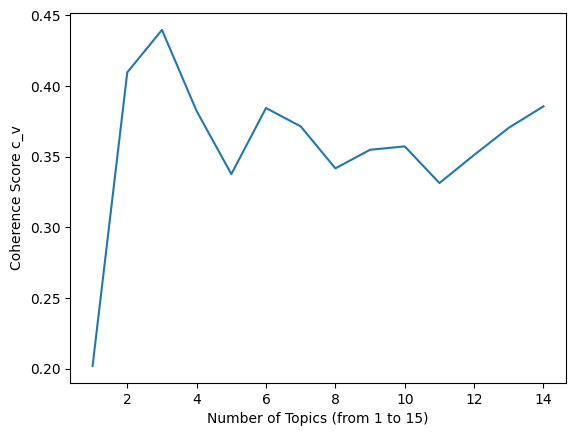

In [8]:
lda_model.plot_optimal_coherent_scores() # potential arguments should be discuss here

In [9]:
# number of topics = 6 other good examples are 3 and 10 based on the c_v measure
lda_model.create_lda_model(6)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.16666666666666666
INFO:gensim.models.ldamodel:using symmetric eta at 0.16666666666666666
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 6 topics, 100 passes over the supplied corpus of 5460 documents, updating every 8000 documents, evaluating every ~5460 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.003*"able" + 0.002*""" + 0.002*"effect" + 0.002*"he

INFO:gensim.models.ldamodel:topic #4 (0.167): 0.004*"medications" + 0.004*"depression" + 0.004*"medication" + 0.004*"oral" + 0.004*"osteoporosis" + 0.004*"pill" + 0.003*"estradiol" + 0.003*"effective" + 0.003*"gain" + 0.003*"possible"
INFO:gensim.models.ldamodel:topic diff=0.170123, rho=0.359675
INFO:gensim.models.ldamodel:-8.158 per-word bound, 285.6 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.003*"bit" + 0.003*"talk" + 0.003*"thought" + 0.003*""" + 0.003*"young" + 0.003*"support" + 0.003*"sometimes" + 0.003*"end" + 0.003*"said" + 0

INFO:gensim.models.ldamodel:topic #4 (0.167): 0.005*"depression" + 0.005*"medications" + 0.005*"medication" + 0.004*"osteoporosis" + 0.004*"effective" + 0.004*"pill" + 0.004*"effect" + 0.004*"oral" + 0.004*"estradiol" + 0.004*"mg"
INFO:gensim.models.ldamodel:topic diff=0.137699, rho=0.280276
INFO:gensim.models.ldamodel:-8.040 per-word bound, 263.3 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 10, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 10, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 10, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.005*"phytoestrogens" + 0.004*"products" + 0.004*""" + 0.003*"floor" + 0.003*"knees" + 0.003*"endometriosis" + 0.003*"information" + 0.003*"bla

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.007*"ovaries" + 0.006*"estradiol" + 0.006*"testosterone" + 0.005*"vagina" + 0.004*"osteoporosis" + 0.004*"test" + 0.004*"uterus" + 0.004*"final" + 0.003*"year" + 0.003*"fsh"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.005*"histamine" + 0.005*"natural" + 0.004*"water" + 0.004*"sugar" + 0.004*"g" + 0.003*"iodine" + 0.003*"works" + 0.003*"milk" + 0.003*"autoimmune" + 0.003*"anxiety"
INFO:gensim.models.ldamodel:topic diff=0.100553, rho=0.237490
INFO:gensim.models.ldamodel:-7.981 per-word bound, 252.7 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 15, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 15, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 15, dispatched chunk #2 = documents up to #5460/5460, outstanding

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.008*"ovaries" + 0.007*"estradiol" + 0.006*"testosterone" + 0.006*"vagina" + 0.005*"uterus" + 0.005*"test" + 0.005*"osteoporosis" + 0.004*"final" + 0.004*"poi" + 0.004*"fsh"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.005*"eat" + 0.005*"alcohol" + 0.005*"strength" + 0.005*"inflammation" + 0.005*"eating" + 0.005*"muscles" + 0.005*"gut" + 0.005*"helps" + 0.005*"recovery" + 0.004*"performance"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.006*"phytoestrogens" + 0.006*"products" + 0.005*"endometriosis" + 0.004*""" + 0.004*"knees" + 0.004*"floor" + 0.004*"information" + 0.004*"bladder" + 0.003*"arms" + 0.003*"hips"
INFO:gensim.models.ldamodel:topic diff=0.072864, rho=0.209749
INFO:gensim.models.ldamodel:-7.952 per-word bound, 247.7 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 20, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
IN

INFO:gensim.models.ldamodel:topic #0 (0.167): 0.006*"products" + 0.006*"phytoestrogens" + 0.005*"endometriosis" + 0.005*""" + 0.004*"knees" + 0.004*"floor" + 0.004*"information" + 0.004*"bladder" + 0.004*"feet" + 0.003*"hips"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.009*"ovaries" + 0.007*"testosterone" + 0.007*"estradiol" + 0.007*"vagina" + 0.005*"test" + 0.005*"uterus" + 0.005*"osteoporosis" + 0.005*"final" + 0.005*"poi" + 0.004*"tissues"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.006*"histamine" + 0.005*"natural" + 0.005*"water" + 0.004*"iodine" + 0.004*"sugar" + 0.004*"g" + 0.004*"autoimmune" + 0.004*"migraines" + 0.004*"works" + 0.003*"anxiety"
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.005*"talk" + 0.005*"i'd" + 0.004*"thought" + 0.004*"got" + 0.004*"said" + 0.004*"bit" + 0.004*"story" + 0.003*"thing" + 0.003*"remember" + 0.003*"young"
INFO:gensim.models.ldamodel:topic diff=0.053717, rho=0.189900
INFO:gensim.models.ldamodel:-7.935 per-word bound, 244.7 perplexity 

INFO:gensim.models.ldamodel:topic #1 (0.167): 0.006*"eat" + 0.006*"alcohol" + 0.005*"strength" + 0.005*"eating" + 0.005*"muscles" + 0.005*"helps" + 0.005*"inflammation" + 0.005*"grams" + 0.005*"gut" + 0.005*"performance"
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"talk" + 0.005*"i'd" + 0.004*"thought" + 0.004*"got" + 0.004*"said" + 0.004*"bit" + 0.004*"story" + 0.004*"thing" + 0.003*"remember" + 0.003*"own"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"depression" + 0.006*"medications" + 0.005*"medication" + 0.005*"conditions" + 0.005*"effective" + 0.005*"osteoporosis" + 0.005*"effect" + 0.005*"pill" + 0.005*"data" + 0.004*"associated"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.006*"histamine" + 0.005*"natural" + 0.005*"water" + 0.004*"migraines" + 0.004*"iodine" + 0.004*"sugar" + 0.004*"autoimmune" + 0.004*"works" + 0.004*"anxiety" + 0.004*"g"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.007*"products" + 0.006*"phytoestrogens" + 0.005*"endometriosis" + 0.005*""

INFO:gensim.models.ldamulticore:PROGRESS: pass 34, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.007*"products" + 0.006*"phytoestrogens" + 0.005*"endometriosis" + 0.005*""" + 0.004*"knees" + 0.004*"floor" + 0.004*"information" + 0.004*"medicine" + 0.004*"bladder" + 0.004*"feet"
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"talk" + 0.005*"i'd" + 0.004*"thought" + 0.004*"got" + 0.004*"said" + 0.004*"bit" + 0.004*"story" + 0.004*"thing" + 0.003*"own" + 0.003*"remember"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.006*"eat" + 0.006*"alcohol" + 0.005*"strength" + 0.005*"eating" + 0.005*"muscles" + 0.005*"helps" + 0.005*"inflammation" + 0.005*"grams" + 0.005*"gut" + 0.005*"performance"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"depression" + 0.006*"medications" + 0.006*"conditions" + 0.005*"medication" + 0.005*"effective" + 0.005*"osteoporosis" + 0.005*"effect" + 0.005*"pill" + 0.005*"data" + 0.0

INFO:gensim.models.ldamulticore:PROGRESS: pass 39, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 39, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 39, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.006*"eat" + 0.006*"alcohol" + 0.005*"strength" + 0.005*"eating" + 0.005*"muscles" + 0.005*"helps" + 0.005*"grams" + 0.005*"inflammation" + 0.005*"gut" + 0.005*"performance"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.008*"products" + 0.007*"phytoestrogens" + 0.005*""" + 0.005*"endometriosis" + 0.004*"knees" + 0.004*"floor" + 0.004*"medicine" + 0.004*"information" + 0.004*"product" + 0.004*"feet"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.010*"ovaries" + 0.008*"testosterone" + 0.008*"vagina" + 0.008*"estradiol" + 0.006*"test" + 0.006*"uterus" + 0.005*"final" +

INFO:gensim.models.ldamodel:topic diff=0.020638, rho=0.146286
INFO:gensim.models.ldamodel:-7.909 per-word bound, 240.3 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 44, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 44, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 44, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"depression" + 0.006*"medications" + 0.006*"conditions" + 0.006*"medication" + 0.005*"effective" + 0.005*"osteoporosis" + 0.005*"effect" + 0.005*"pill" + 0.005*"data" + 0.005*"associated"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.008*"products" + 0.007*"phytoestrogens" + 0.005*""" + 0.005*"endometriosis" + 0.005*"medicine" + 0.005*"knees" + 0.004*"floor" + 0.00

INFO:gensim.models.ldamodel:topic #0 (0.167): 0.009*"products" + 0.007*"phytoestrogens" + 0.006*""" + 0.005*"medicine" + 0.005*"knees" + 0.004*"floor" + 0.004*"endometriosis" + 0.004*"information" + 0.004*"product" + 0.004*"supplements"
INFO:gensim.models.ldamodel:topic diff=0.016976, rho=0.139036
INFO:gensim.models.ldamodel:-7.906 per-word bound, 239.8 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 49, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 49, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 49, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"depression" + 0.006*"medications" + 0.006*"conditions" + 0.006*"medication" + 0.005*"osteoporosis" + 0.005*"effective" + 0.005*"eff

INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"talk" + 0.005*"i'd" + 0.004*"thought" + 0.004*"got" + 0.004*"said" + 0.004*"bit" + 0.004*"thing" + 0.004*"story" + 0.003*"own" + 0.003*"remember"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"depression" + 0.006*"medications" + 0.006*"conditions" + 0.006*"medication" + 0.005*"osteoporosis" + 0.005*"effective" + 0.005*"effect" + 0.005*"pill" + 0.005*"data" + 0.005*"associated"
INFO:gensim.models.ldamodel:topic diff=0.014083, rho=0.132768
INFO:gensim.models.ldamodel:-7.903 per-word bound, 239.4 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 54, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 54, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 54, dispatched chunk #2 = documents up to #5460/5460, outstan

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.010*"ovaries" + 0.009*"testosterone" + 0.008*"vagina" + 0.008*"estradiol" + 0.006*"uterus" + 0.006*"test" + 0.006*"final" + 0.006*"poi" + 0.005*"surgery" + 0.005*"tissues"
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"talk" + 0.005*"i'd" + 0.004*"thought" + 0.004*"got" + 0.004*"said" + 0.004*"bit" + 0.004*"thing" + 0.004*"story" + 0.003*"own" + 0.003*"remember"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.006*"eat" + 0.006*"alcohol" + 0.006*"eating" + 0.005*"strength" + 0.005*"muscles" + 0.005*"helps" + 0.005*"grams" + 0.005*"gut" + 0.005*"performance" + 0.005*"inflammation"
INFO:gensim.models.ldamodel:topic diff=0.011890, rho=0.127278
INFO:gensim.models.ldamodel:-7.901 per-word bound, 239.1 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 59, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:P

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.011*"ovaries" + 0.009*"testosterone" + 0.008*"vagina" + 0.008*"estradiol" + 0.006*"uterus" + 0.006*"test" + 0.006*"final" + 0.006*"poi" + 0.005*"surgery" + 0.005*"tissues"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.006*"eat" + 0.006*"eating" + 0.006*"alcohol" + 0.005*"strength" + 0.005*"muscles" + 0.005*"helps" + 0.005*"grams" + 0.005*"gut" + 0.005*"performance" + 0.005*"recovery"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.006*"histamine" + 0.005*"works" + 0.005*"migraines" + 0.005*"page" + 0.005*"water" + 0.005*"natural" + 0.005*"iodine" + 0.005*"magnesium" + 0.005*"perimenopausal" + 0.004*"autoimmune"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"depression" + 0.006*"medications" + 0.006*"conditions" + 0.006*"medication" + 0.005*"osteoporosis" + 0.005*"effective" + 0.005*"effect" + 0.005*"pill" + 0.005*"data" + 0.005*"associated"
INFO:gensim.models.ldamodel:topic diff=0.010197, rho=0.122416
INFO:gensim.models.ldamodel:-

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.011*"ovaries" + 0.009*"testosterone" + 0.008*"vagina" + 0.008*"estradiol" + 0.007*"uterus" + 0.006*"final" + 0.006*"test" + 0.006*"poi" + 0.005*"surgery" + 0.005*"tissues"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.006*"eat" + 0.006*"eating" + 0.005*"alcohol" + 0.005*"strength" + 0.005*"muscles" + 0.005*"helps" + 0.005*"grams" + 0.005*"gut" + 0.005*"performance" + 0.005*"recovery"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.009*"products" + 0.007*"phytoestrogens" + 0.006*""" + 0.005*"medicine" + 0.005*"supplements" + 0.005*"product" + 0.005*"knees" + 0.005*"information" + 0.005*"floor" + 0.004*"s"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.006*"histamine" + 0.006*"works" + 0.005*"migraines" + 0.005*"page" + 0.005*"water" + 0.005*"magnesium" + 0.005*"natural" + 0.005*"iodine" + 0.005*"perimenopausal" + 0.004*"autoimmune"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"depression" + 0.006*"medications" + 0.006*"conditions

INFO:gensim.models.ldamulticore:PROGRESS: pass 73, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 73, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.006*"eat" + 0.006*"eating" + 0.005*"alcohol" + 0.005*"strength" + 0.005*"muscles" + 0.005*"helps" + 0.005*"grams" + 0.005*"gut" + 0.005*"performance" + 0.005*"recovery"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.011*"ovaries" + 0.009*"testosterone" + 0.009*"vagina" + 0.008*"estradiol" + 0.007*"uterus" + 0.006*"final" + 0.006*"test" + 0.006*"poi" + 0.005*"surgery" + 0.005*"tissues"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.009*"products" + 0.007*"phytoestrogens" + 0.006*""" + 0.005*"medicine" + 0.005*"supplements" + 0.005*"product" + 0.005*"knees" + 0.005*"information" + 0.005*"s" + 0.005*"floor"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"medications" + 0.006*"depression"

INFO:gensim.models.ldamulticore:PROGRESS: pass 78, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 78, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 78, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"medications" + 0.006*"depression" + 0.006*"conditions" + 0.006*"medication" + 0.006*"osteoporosis" + 0.005*"effective" + 0.005*"effect" + 0.005*"pill" + 0.005*"data" + 0.005*"associated"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.006*"histamine" + 0.006*"works" + 0.005*"migraines" + 0.005*"magnesium" + 0.005*"page" + 0.005*"water" + 0.005*"perimenopausal" + 0.005*"iodine" + 0.005*"natural" + 0.004*"anxiety"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.009*"products" + 0.007*"phytoestrogens" + 0.006*""" + 0.005*"medicine" + 0.005*"supplements" + 0.005*"pro

INFO:gensim.models.ldamodel:topic diff=0.006395, rho=0.108002
INFO:gensim.models.ldamodel:-7.894 per-word bound, 237.9 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 83, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 83, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 83, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"talk" + 0.005*"i'd" + 0.004*"thought" + 0.004*"got" + 0.004*"said" + 0.004*"bit" + 0.004*"thing" + 0.004*"story" + 0.003*"own" + 0.003*"remember"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.010*"products" + 0.007*"phytoestrogens" + 0.006*""" + 0.005*"medicine" + 0.005*"supplements" + 0.005*"s" + 0.005*"product" + 0.005*"information" + 0.005*"knees" + 0.005*"floo

INFO:gensim.models.ldamodel:topic #4 (0.167): 0.006*"medications" + 0.006*"depression" + 0.006*"conditions" + 0.006*"medication" + 0.006*"osteoporosis" + 0.005*"effective" + 0.005*"effect" + 0.005*"pill" + 0.005*"data" + 0.005*"associated"
INFO:gensim.models.ldamodel:topic diff=0.005706, rho=0.104984
INFO:gensim.models.ldamodel:-7.893 per-word bound, 237.7 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 88, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 88, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 88, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.006*"histamine" + 0.006*"works" + 0.005*"magnesium" + 0.005*"migraines" + 0.005*"page" + 0.005*"perimenopausal" + 0.005*"iodine" + 0.

INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"talk" + 0.005*"i'd" + 0.004*"thought" + 0.004*"got" + 0.004*"said" + 0.004*"bit" + 0.004*"thing" + 0.004*"story" + 0.003*"own" + 0.003*"remember"
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.011*"ovaries" + 0.009*"testosterone" + 0.009*"vagina" + 0.008*"estradiol" + 0.007*"uterus" + 0.006*"final" + 0.006*"test" + 0.006*"poi" + 0.005*"surgery" + 0.005*"ovulation"
INFO:gensim.models.ldamodel:topic diff=0.005157, rho=0.102206
INFO:gensim.models.ldamodel:-7.892 per-word bound, 237.6 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 93, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 93, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 93, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3


INFO:gensim.models.ldamodel:topic #0 (0.167): 0.010*"products" + 0.007*"phytoestrogens" + 0.006*""" + 0.006*"medicine" + 0.005*"s" + 0.005*"supplements" + 0.005*"product" + 0.005*"information" + 0.005*"dr" + 0.005*"knees"
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"talk" + 0.005*"i'd" + 0.004*"thought" + 0.004*"got" + 0.004*"said" + 0.004*"bit" + 0.004*"thing" + 0.004*"story" + 0.003*"own" + 0.003*"remember"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.006*"works" + 0.006*"histamine" + 0.006*"magnesium" + 0.005*"migraines" + 0.005*"page" + 0.005*"perimenopausal" + 0.005*"iodine" + 0.005*"endometriosis" + 0.005*"anxiety" + 0.005*"water"
INFO:gensim.models.ldamodel:topic diff=0.004692, rho=0.099637
INFO:gensim.models.ldamodel:-7.891 per-word bound, 237.4 perplexity estimate based on a held-out corpus of 1460 documents with 28664 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 98, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.model

In [10]:
# add topics to dataframe - for each paragraph
lda_model.format_topics_sentences()
lda_model.df.head()  # checking the first five records

,book,chapter,paragraph_number,paragraph,tokens,processed,dominant_topic,perc_contribution,topic_keywords
0,Hormone Repair Manual,1,1,Hormone revolution:\n\n\n\n\n\nwhy everything ...,"[hormone, revolution, why, everything, is, dif...","[revolution, everything, second, you've, picke...",2,0.7969,"talk, i'd, thought, got, said, bit, thing, sto..."
1,Hormone Repair Manual,1,2,This book is about both the process of perimen...,"[this, book, is, about, both, the, process, of...","[process, phase, together, four, decades, unde...",3,0.6416,"ovaries, testosterone, vagina, estradiol, uter..."
2,Hormone Repair Manual,1,3,"First, understand that symptoms (if you experi...","[first, understand, that, symptoms, if, you, e...","[understand, temporary, perimenopausal, tempor...",5,0.5017,"works, histamine, magnesium, migraines, page, ..."
3,Hormone Repair Manual,1,4,"Next, understand that perimenopause is not jus...","[next, understand, that, perimenopause, is, no...","[next, understand, sequence, events, beginning...",3,0.8401,"ovaries, testosterone, vagina, estradiol, uter..."
4,Hormone Repair Manual,1,5,"Finally, know that perimenopause and the early...","[finally, know, that, perimenopause, and, the,...","[finally, critical_window, true, critical_wind...",5,0.9663,"works, histamine, magnesium, migraines, page, ..."


In [11]:
all_lda_df = lda_model.df

## Sentiments
Extract the sentiments of each paragraph. Approach is very simple, when we segment the paragraph into sentences using Spacy library, then we predict sentiment of each sentence:
- if all neutral -> neutral
- if all positive -> positive
- if all negative -> negative
- if positive/negative > 1.5 -> positive
- if negative/positive > 1.5 -> negative
- else -> neutral

In [12]:
sentiment_model = Sentiment(all_lda_df)

In [13]:
sentiment_model.predict()  # this will take some time to finish, be patient :)

INFO:root:start computing the sentiments - the process will take time, be patient


In [14]:
sentiment_model.df.head()

,book,chapter,paragraph_number,paragraph,tokens,processed,dominant_topic,perc_contribution,topic_keywords,sentiment
0,Hormone Repair Manual,1,1,Hormone revolution:\n\n\n\n\n\nwhy everything ...,"[hormone, revolution, why, everything, is, dif...","[revolution, everything, second, you've, picke...",2,0.7969,"talk, i'd, thought, got, said, bit, thing, sto...",POSITIVE
1,Hormone Repair Manual,1,2,This book is about both the process of perimen...,"[this, book, is, about, both, the, process, of...","[process, phase, together, four, decades, unde...",3,0.6416,"ovaries, testosterone, vagina, estradiol, uter...",POSITIVE
2,Hormone Repair Manual,1,3,"First, understand that symptoms (if you experi...","[first, understand, that, symptoms, if, you, e...","[understand, temporary, perimenopausal, tempor...",5,0.5017,"works, histamine, magnesium, migraines, page, ...",POSITIVE
3,Hormone Repair Manual,1,4,"Next, understand that perimenopause is not jus...","[next, understand, that, perimenopause, is, no...","[next, understand, sequence, events, beginning...",3,0.8401,"ovaries, testosterone, vagina, estradiol, uter...",NEGATIVE
4,Hormone Repair Manual,1,5,"Finally, know that perimenopause and the early...","[finally, know, that, perimenopause, and, the,...","[finally, critical_window, true, critical_wind...",5,0.9663,"works, histamine, magnesium, migraines, page, ...",POSITIVE


In [15]:
sentiment_model.export_to_csv()

INFO:root:file is writen successfully


## Visualization

Here, we generate a set of visualizations to help interpret:
- mixture of sentiments in each chapter of each book
- mixture of topics in each chapter of each book
- mixture of sentiments for each topic in each book
- topics and what they capture

In [16]:
vis = Vis(sentiment=sentiment_model, lda=lda_model)

In [17]:
vis.treemap_chapter_sentiments()  # treemap of chapter -> sentiments

INFO:root:chapter-sentiment treemap html file is saved in figures/chapter_sentiments.html


In [18]:
vis.treemap_chapter_topic()  # treemap of chapter -> topics

INFO:root:chapter-topic treemap html is saved in: 
	figures/chapter_topic.html


{'(?)': 'lightgrey', '2': '#fd7f6f', '3': '#7eb0d5', '5': '#b2e061', '4': '#bd7ebe', '0': '#ffb55a', '1': '#ffee65'}


In [19]:
vis.treemap_topic_sentiment()  # treemap of topics -> sentiments

INFO:root:topic-sentiment treemap html is saved in: 
	figures/topic_sentiment.html


In [20]:
vis.pyviz_topics()  # pyVis topic analysis

INFO:root:pyvis html visualization is saved in: 
	figures/pyvis_topics.html


/Users/ehsanhamzei/opt/anaconda3/envs/lda_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

INFO:root:wordclouds are generated and saved in:	figures/wordclouds.svg


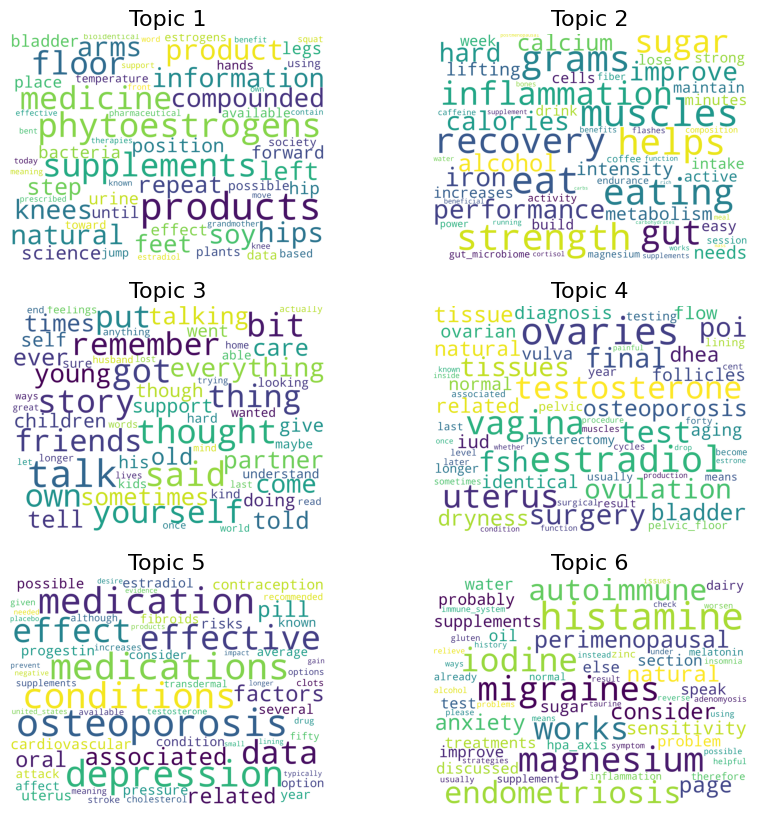

In [22]:
vis.generate_topics_wordcloud()

## Per book
Performing topic modelling for each book:

1. Hormone Repair Manual
2. Next Level
3. Queen Menopause
4. The Menopause Manifesto
5. Menopausing

In [28]:
hrp_book_name = 'Hormone Repair Manual'
nl_book_name = 'Next Level'
qm_book_name = 'Queen Menopause'
tmm_book_name = 'The Menopause Manifesto'
m_book_name = 'Menopausing'

### 1. Hormone Repair Manual

In [29]:
hrp_df = bookshelf.create_corpus_custom_df(hrp_book_name)
hrp_df.head()

,book,chapter,paragraph_number,paragraph
0,Hormone Repair Manual,1,1,Hormone revolution:\n\n\n\n\n\nwhy everything ...
1,Hormone Repair Manual,1,2,This book is about both the process of perimen...
2,Hormone Repair Manual,1,3,"First, understand that symptoms (if you experi..."
3,Hormone Repair Manual,1,4,"Next, understand that perimenopause is not jus..."
4,Hormone Repair Manual,1,5,"Finally, know that perimenopause and the early..."


INFO:root:Preprocessor initiated...
INFO:root:	All paragraph are normalized by removing unwanted characters
INFO:root:	tokenization and initial preprocessing is done
INFO:root:	word count is done:
INFO:root:		{'is': 1309, "it's": 234, 'because': 282, 'you': 963, 'that': 787, 'with': 666, 'your': 793, 'and': 2508, "you're": 168, 'not': 416, 'by': 292, 'or': 867, 'more': 247, 'it': 606, 'can': 694, 'all': 156, 'at': 264, 'the': 2859, 'a': 1586, 'but': 367, 'perimenopause': 219, 'which': 516, 'to': 2046, 'from': 273, 'menopause': 352, 'one': 160, 'about': 203, 'of': 2104, 'could': 164, 'need': 186, 'chapter': 251, 'in': 1046, 'symptoms': 301, 'if': 462, 'are': 405, 'be': 482, 'my': 154, 'progesterone': 367, 'high': 198, 'estrogen': 526, 'insulin': 280, 'as': 630, 'for': 894, 'have': 358, 'i': 338, 'an': 221, 'also': 273, 'so': 194, 'may': 176, 'such': 238, 'pain': 192, 'on': 321, 'other': 206, 'risk': 211, 'when': 157, 'doctor': 185, 'thyroid': 183, 'disease': 187, 'resistance': 211, "'":

preprocessing workflow started...


INFO:gensim.utils:FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<159 phrases, min_count=5, threshold=100> from Phrases<43627 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.04s', 'datetime': '2023-06-11T14:16:02.531676', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.models.phrases:exporting phrases from Phrases<44133 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<172 phrases, min_count=5, threshold=100> from Phrases<44133 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.04s', 'datetime': '2023-06-11T14:16:02.573430', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:root:analyzing bigrams and trigrams
INFO:root:	Preprocessing done

INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 1160 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.5
INFO:gensim.models.ldamodel:using symmetric eta at 0.5
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 2 topics, 10 passes over the supplied corpus of 1157 documents, updating every 16000 documents, evaluating every ~1157 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.006*"high" + 0.006*"so" + 0.006*"doctor" + 0.005*"may" + 0.005*"'" + 0.005*"need" + 0.005*"could" + 0.005*"pain" + 0.005*"you're" + 0.005*"this"
I

INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 1160 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.3333333333333333
INFO:gensim.models.ldamodel:using symmetric eta at 0.3333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 3 topics, 10 passes over the supplied corpus of 1157 documents, updating every 16000 documents, evaluating every ~1157 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.013*"'" + 0.009*"my" + 0.008*"doctor" + 0.008*"she" + 0.008*"was" + 0.008*"you're" + 0.007*"her" + 0.007*"women" + 0.006*"so" + 0.006*"may"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.011*"thyroid" + 0.009*"disease" + 0.009*"high" + 0.007*"healthy" + 0.007*"sleep" + 0.006*"low" + 0.006*"histamine" + 0.006*"how" + 0.005*"brain" + 0.005*"during"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.006*"than" + 0.006*"need" + 0.005*"magnesium" + 0.005*"brain" + 0.005*"so" + 0.005*"health" + 0.005*"cause" + 0.004*"one" + 0.004*"mg" + 0.004*"healthy"
INFO:gensim.models.ldamodel:topic diff=0.086632, rho=0.323111
INFO:gensim.models.ldamodel:-6.995 per-word bound, 127.6 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = doc

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.015*"thyroid" + 0.013*"disease" + 0.010*"pain" + 0.008*"cause" + 0.007*"so" + 0.007*"doctor" + 0.006*"histamine" + 0.006*"autoimmune" + 0.006*"include" + 0.006*"high"
INFO:gensim.models.ldamodel:topic diff=0.201570, rho=0.423391
INFO:gensim.models.ldamodel:-7.057 per-word bound, 133.1 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.016*"'" + 0.010*"my" + 0.010*"she" + 0.009*"her" + 0.008*"was" + 0.008*"you're" + 0.007*"doctor" + 0.007*"had" + 0.006*"we" + 0.006*"so"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.010*"healthy" + 0.008*"brain" + 0.008*"need" + 0.007*"they" + 0.007*"how" + 0.006*"body" + 0.006*"health" + 0.006*"high" + 0.006*"sleep" + 0.006*"low"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.007*"than" + 0.005*"alcohol

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.006*"need" + 0.006*"doctor" + 0.006*"so" + 0.005*"take" + 0.005*"see" + 0.005*"this" + 0.005*"may" + 0.005*"all" + 0.004*"some" + 0.004*"you're"
INFO:gensim.models.ldamodel:topic diff=0.764047, rho=1.000000
INFO:gensim.models.ldamodel:-7.452 per-word bound, 175.1 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.008*"'" + 0.007*"high" + 0.007*"her" + 0.006*"may" + 0.006*"pain" + 0.006*"need" + 0.006*"my" + 0.006*"she" + 0.006*"you're" + 0.006*"so"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"'" + 0.006*"healthy" + 0.006*"need" + 0.006*"when" + 0.005*"they" + 0.005*"you're" + 0.005*"brain" + 0.005*"how" + 0.005*"one" + 0.005*"high"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.006*"when" + 0.006*"doctor" + 0.005*"than" + 0.005*"

INFO:gensim.models.ldamodel:-7.026 per-word bound, 130.3 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.019*"'" + 0.013*"my" + 0.012*"she" + 0.011*"her" + 0.011*"was" + 0.009*"had" + 0.008*"women" + 0.008*"we" + 0.008*"you're" + 0.007*"been"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.013*"brain" + 0.010*"healthy" + 0.008*"health" + 0.008*"low" + 0.007*"may" + 0.007*"during" + 0.007*"bone" + 0.007*"they" + 0.006*"high" + 0.006*"body"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.010*"than" + 0.008*"you're" + 0.007*"bleeding" + 0.007*"make" + 0.007*"still" + 0.006*"only" + 0.006*"so" + 0.006*"no" + 0.006*"iron" + 0.006*"ovulation"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.023*"thyroid" + 0.019*"disease" + 0.016*"pain" + 0.009*"histamine" + 0.009*"cause" + 0.009*"autoimmu

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.016*"thyroid" + 0.012*"disease" + 0.009*"pain" + 0.008*"histamine" + 0.007*"cause" + 0.007*"so" + 0.006*"some" + 0.006*"autoimmune" + 0.005*"women" + 0.005*"doctor"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.008*"all" + 0.008*"doctor" + 0.006*"they" + 0.006*"one" + 0.006*"health" + 0.006*"healthy" + 0.006*"including" + 0.005*"could" + 0.005*"disease" + 0.005*"mood"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.010*"need" + 0.007*"take" + 0.007*"see" + 0.006*"how" + 0.006*"doctor" + 0.006*"this" + 0.006*"so" + 0.005*"magnesium" + 0.005*"healthy" + 0.005*"hormone_therapy"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.009*"'" + 0.007*"need" + 0.007*"when" + 0.006*"brain" + 0.006*"healthy" + 0.006*"they" + 0.005*"you're" + 0.005*"how" + 0.005*"first" + 0.005*"bone"
INFO:gensim.models.ldamodel:topic diff=0.357304, rho=0.528627
INFO:gensim.models.ldamodel:-7.268 per-word bound, 154.2 perplexity estimate based on a held-out corpus of 11

INFO:gensim.models.ldamodel:topic #3 (0.167): 0.024*"thyroid" + 0.018*"disease" + 0.016*"pain" + 0.012*"histamine" + 0.012*"cause" + 0.009*"autoimmune" + 0.007*"doctor" + 0.007*"high" + 0.007*"common" + 0.007*"endometriosis"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.011*"brain" + 0.010*"bone" + 0.009*"they" + 0.008*"during" + 0.007*"migraines" + 0.007*"when" + 0.007*"hot_flushes" + 0.006*"health" + 0.006*"periods" + 0.006*"sleep"
INFO:gensim.models.ldamodel:topic #5 (0.167): 0.011*"healthy" + 0.010*"health" + 0.008*"reduce" + 0.008*"alcohol" + 0.007*"including" + 0.007*"one" + 0.006*"brain" + 0.006*"many" + 0.006*"all" + 0.006*"body"
INFO:gensim.models.ldamodel:topic diff=0.201888, rho=0.323111
INFO:gensim.models.ldamodel:-7.036 per-word bound, 131.2 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamode

INFO:gensim.models.ldamodel:topic #5 (0.143): 0.009*"healthy" + 0.007*"all" + 0.007*"reduce" + 0.007*"they" + 0.006*"alcohol" + 0.006*"health" + 0.006*"this" + 0.006*"one" + 0.005*"hormone_therapy" + 0.005*"doctor"
INFO:gensim.models.ldamodel:topic diff=0.425818, rho=0.467346
INFO:gensim.models.ldamodel:-7.201 per-word bound, 147.2 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.020*"'" + 0.013*"she" + 0.013*"my" + 0.012*"her" + 0.011*"was" + 0.009*"had" + 0.008*"doctor" + 0.008*"you're" + 0.007*"we" + 0.007*"feel"
INFO:gensim.models.ldamodel:topic #2 (0.143): 0.009*"brain" + 0.008*"than" + 0.008*"you're" + 0.007*"up" + 0.007*"when" + 0.007*"even" + 0.006*"could" + 0.006*"bleeding" + 0.005*"after" + 0.005*"protein"
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.011*"healthy" + 0.00

INFO:gensim.models.ldamodel:topic #1 (0.143): 0.011*"bone" + 0.010*"they" + 0.009*"first" + 0.008*"during" + 0.008*"health" + 0.008*"could" + 0.008*"years" + 0.008*"hot_flushes" + 0.007*"period" + 0.007*"after"
INFO:gensim.models.ldamodel:topic diff=0.203506, rho=0.307460
INFO:gensim.models.ldamodel:-7.037 per-word bound, 131.3 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1527, num_topics=7, decay=0.5, chunksize=2000> in 5.00s', 'datetime': '2023-06-11T14:16:41.308506', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue


INFO:gensim.models.ldamodel:topic #5 (0.125): 0.011*"brain" + 0.009*"healthy" + 0.008*"health" + 0.008*"all" + 0.008*"this" + 0.007*"mood" + 0.007*"many" + 0.006*"alcohol" + 0.006*"what" + 0.006*"how"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.015*"need" + 0.012*"magnesium" + 0.009*"works" + 0.009*"healthy" + 0.009*"protein" + 0.008*"how" + 0.008*"mg" + 0.008*"know" + 0.008*"take" + 0.007*"dose"
INFO:gensim.models.ldamodel:topic #6 (0.125): 0.016*"high" + 0.011*"thyroid" + 0.011*"disease" + 0.009*"no" + 0.008*"than" + 0.008*"'" + 0.007*"one" + 0.007*"most" + 0.007*"this" + 0.007*"iodine"
INFO:gensim.models.ldamodel:topic #7 (0.125): 0.011*"pill" + 0.010*"endometriosis" + 0.009*"so" + 0.007*"only" + 0.007*"they" + 0.006*"low" + 0.006*"vaginal" + 0.006*"was" + 0.006*"she" + 0.005*"high"
INFO:gensim.models.ldamodel:topic #1 (0.125): 0.009*"bone" + 0.009*"they" + 0.008*"during" + 0.007*"may" + 0.007*"low" + 0.007*"brain" + 0.007*"health" + 0.006*"foods" + 0.006*"sugar" + 0.006*"health

INFO:gensim.models.ldamodel:topic #0 (0.111): 0.008*"pain" + 0.006*"high" + 0.006*"may" + 0.006*"need" + 0.006*"'" + 0.006*"could" + 0.006*"you're" + 0.005*"so" + 0.005*"her" + 0.005*"then"
INFO:gensim.models.ldamodel:topic #8 (0.111): 0.007*"need" + 0.006*"may" + 0.006*"'" + 0.005*"so" + 0.005*"high" + 0.005*"doctor" + 0.005*"low" + 0.005*"you're" + 0.004*"healthy" + 0.004*"was"
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.007*"so" + 0.007*"thyroid" + 0.006*"disease" + 0.005*"was" + 0.005*"some" + 0.005*"pain" + 0.005*"cause" + 0.005*"this" + 0.005*"could" + 0.005*"doctor"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.007*"'" + 0.006*"so" + 0.006*"need" + 0.005*"when" + 0.005*"high" + 0.005*"see" + 0.005*"they" + 0.005*"health" + 0.005*"she" + 0.005*"you're"
INFO:gensim.models.ldamodel:topic diff=0.953707, rho=1.000000
INFO:gensim.models.ldamodel:-7.858 per-word bound, 232.0 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamu

INFO:gensim.models.ldamodel:topic #1 (0.111): 0.010*"during" + 0.009*"first" + 0.009*"health" + 0.008*"brain" + 0.008*"bone" + 0.008*"they" + 0.008*"when" + 0.008*"period" + 0.007*"sleep" + 0.007*"healthy"
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.024*"thyroid" + 0.022*"pain" + 0.013*"cause" + 0.013*"histamine" + 0.012*"disease" + 0.008*"t" + 0.008*"hormone" + 0.008*"period" + 0.008*"treatment" + 0.008*"endometriosis"
INFO:gensim.models.ldamodel:topic diff=0.412012, rho=0.363252
INFO:gensim.models.ldamodel:-7.169 per-word bound, 143.9 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.111): 0.013*"healthy" + 0.010*"reduce" + 0.009*"brain" + 0.008*"including" + 0.008*"food" + 0.008*"they" + 0.008*"dementia" + 0.008*"health" + 0.007*"many" + 0.007*"all"
INFO:gensim.models.ldamodel:topic #8

INFO:gensim.models.ldamodel:topic diff=0.616512, rho=0.622754
INFO:gensim.models.ldamodel:-7.622 per-word bound, 197.0 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #9 (0.100): 0.008*"one" + 0.008*"pain" + 0.008*"period" + 0.007*"see" + 0.007*"diet" + 0.007*"so" + 0.006*"treatment" + 0.006*"women" + 0.006*"vaginal" + 0.006*"some"
INFO:gensim.models.ldamodel:topic #2 (0.100): 0.009*"than" + 0.007*"doctor" + 0.006*"mg" + 0.006*"bleeding" + 0.006*"when" + 0.006*"you're" + 0.005*"so" + 0.005*"after" + 0.005*"need" + 0.005*"could"
INFO:gensim.models.ldamodel:topic #6 (0.100): 0.015*"high" + 0.012*"'" + 0.008*"disease" + 0.008*"may" + 0.008*"one" + 0.007*"thyroid" + 0.007*"than" + 0.007*"my" + 0.007*"just" + 0.006*"low"
INFO:gensim.models.ldamodel:topic #8 (0.100): 0.008*"was" + 0.007*"'" + 0.006*"wo

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #8 (0.100): 0.008*"ovaries" + 0.008*"women" + 0.007*"include" + 0.007*"provided" + 0.007*"high" + 0.006*"was" + 0.006*"pill" + 0.006*"doctor" + 0.006*"some" + 0.006*"one"
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.038*"thyroid" + 0.029*"disease" + 0.015*"pain" + 0.014*"autoimmune" + 0.012*"cause" + 0.009*"t" + 0.009*"hormone" + 0.009*"doctor" + 0.009*"common" + 0.008*"histamine"
INFO:gensim.models.ldamodel:topic #5 (0.100): 0.012*"healthy" + 0.010*"brain" + 0.009*"reduce" + 0.009*"health" + 0.009*"hpa_axis" + 0.008*"dementia" + 0.008*"mood" + 0.007*"hormone_therapy" + 0.007*"heart_disease" + 0.007*"including"
INFO:gensim.models.ldamodel:topic #2 (0.100): 0.013*"than" + 0.011*"iron" + 0.009*"bleeding" + 0.008*"after" + 0.007*"so" + 0.007*"days" + 0.007*"no" + 0.007*"doctor" + 0.007*"you're" + 0.007*"ovulation"
INFO:gensim.mod

INFO:gensim.models.ldamodel:topic #9 (0.091): 0.016*"pain" + 0.010*"period" + 0.009*"endometriosis" + 0.008*"adenomyosis" + 0.008*"diet" + 0.007*"see" + 0.007*"some" + 0.007*"celiac" + 0.007*"one" + 0.006*"only"
INFO:gensim.models.ldamodel:topic #10 (0.091): 0.017*"disease" + 0.012*"may" + 0.012*"thyroid" + 0.012*"autoimmune" + 0.009*"high" + 0.008*"hpa_axis" + 0.008*"brain" + 0.007*"both" + 0.007*"doctor" + 0.006*"test"
INFO:gensim.models.ldamodel:topic #3 (0.091): 0.015*"histamine" + 0.012*"pain" + 0.011*"cause" + 0.008*"thyroid" + 0.008*"sleep" + 0.007*"some" + 0.007*"so" + 0.006*"hormonal_iud" + 0.006*"include" + 0.006*"hormone"
INFO:gensim.models.ldamodel:topic #8 (0.091): 0.008*"bone" + 0.007*"ovaries" + 0.006*"perimenopausal" + 0.006*"mood" + 0.006*"breast_cancer" + 0.006*"need" + 0.005*"surgical" + 0.005*"women" + 0.005*"may" + 0.005*"including"
INFO:gensim.models.ldamodel:topic diff=0.743073, rho=0.467346
INFO:gensim.models.ldamodel:-7.383 per-word bound, 166.9 perplexity esti

INFO:gensim.models.ldamodel:topic #8 (0.091): 0.011*"breast_cancer" + 0.010*"ovaries" + 0.010*"bone" + 0.007*"women" + 0.007*"mood" + 0.007*"perimenopausal" + 0.007*"has" + 0.006*"berberine" + 0.006*"according" + 0.006*"one"
INFO:gensim.models.ldamodel:topic #5 (0.091): 0.017*"healthy" + 0.011*"all" + 0.010*"alcohol" + 0.010*"therapy" + 0.010*"strategies" + 0.009*"t" + 0.009*"reduce" + 0.008*"they" + 0.007*"one" + 0.007*"including"
INFO:gensim.models.ldamodel:topic #1 (0.091): 0.024*"brain" + 0.012*"health" + 0.012*"during" + 0.010*"healthy" + 0.009*"energy" + 0.008*"low" + 0.008*"how" + 0.008*"sleep" + 0.007*"beneficial" + 0.007*"body"
INFO:gensim.models.ldamodel:topic #7 (0.091): 0.017*"'" + 0.016*"pill" + 0.012*"sugar" + 0.009*"so" + 0.009*"had" + 0.009*"dairy" + 0.008*"you're" + 0.008*"she" + 0.008*"could" + 0.008*"wheat"
INFO:gensim.models.ldamodel:topic diff=0.323471, rho=0.307460
INFO:gensim.models.ldamodel:-7.146 per-word bound, 141.6 perplexity estimate based on a held-out cor

INFO:gensim.models.ldamodel:topic #10 (0.083): 0.011*"t" + 0.010*"migraines" + 0.010*"therapy" + 0.009*"thyroid" + 0.008*"low" + 0.008*"one" + 0.008*"high" + 0.008*"brain" + 0.008*"disease" + 0.007*"likely"
INFO:gensim.models.ldamodel:topic #5 (0.083): 0.011*"healthy" + 0.010*"they" + 0.009*"all" + 0.007*"nervous_system" + 0.007*"hormone_therapy" + 0.007*"has" + 0.006*"how" + 0.006*"part" + 0.006*"health" + 0.006*"doctor"
INFO:gensim.models.ldamodel:topic #4 (0.083): 0.017*"need" + 0.011*"protein" + 0.010*"mg" + 0.009*"works" + 0.009*"healthy" + 0.009*"how" + 0.009*"know" + 0.008*"what_else" + 0.008*"take" + 0.008*"dose"
INFO:gensim.models.ldamodel:topic diff=0.752701, rho=0.423391
INFO:gensim.models.ldamodel:-7.351 per-word bound, 163.3 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.083):

INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 1160 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.07692307692307693
INFO:gensim.models.ldamodel:using symmetric eta at 0.07692307692307693
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 13 topics, 10 passes over the supplied corpus of 1157 documents, updating every 16000 documents, evaluating every ~1157 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #5 (0.077): 0.008*"all" + 0.007*"healthy" + 0.007*"doctor" + 0.005*"how" + 0.005*"mood" + 0.005*"could" + 0.005*"my" + 0.005*"t

INFO:gensim.models.ldamodel:topic #11 (0.077): 0.013*"magnesium" + 0.013*"you're" + 0.012*"doctor" + 0.012*"could" + 0.012*"sleep" + 0.009*"this" + 0.009*"menopausal" + 0.009*"hot_flushes" + 0.008*"my" + 0.007*"need"
INFO:gensim.models.ldamodel:topic diff=0.724326, rho=0.389885
INFO:gensim.models.ldamodel:-7.323 per-word bound, 160.1 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #2 (0.077): 0.010*"bleeding" + 0.008*"than" + 0.008*"make" + 0.008*"days" + 0.007*"muscle" + 0.007*"no" + 0.006*"during" + 0.006*"bone" + 0.006*"two" + 0.006*"ovulation"
INFO:gensim.models.ldamodel:topic #4 (0.077): 0.019*"need" + 0.013*"works" + 0.013*"mg" + 0.011*"how" + 0.011*"what_else" + 0.010*"know" + 0.010*"take" + 0.010*"dose" + 0.008*"melatonin" + 0.007*"magnesium"
INFO:gensim.models.ldamodel:topic #9 (0.077): 

INFO:gensim.models.ldamodel:topic diff=1.338458, rho=1.000000
INFO:gensim.models.ldamodel:-8.234 per-word bound, 301.1 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.007*"women" + 0.007*"mood" + 0.006*"need" + 0.006*"include" + 0.006*"bone" + 0.006*"ovaries" + 0.006*"was" + 0.005*"may" + 0.005*"up" + 0.005*"'"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.011*"thyroid" + 0.011*"so" + 0.007*"disease" + 0.007*"her" + 0.006*"healthy" + 0.006*"high" + 0.006*"'" + 0.006*"medication" + 0.006*"need" + 0.006*"she"
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.011*"'" + 0.011*"high" + 0.009*"disease" + 0.008*"thyroid" + 0.007*"no" + 0.007*"one" + 0.007*"iron" + 0.006*"this" + 0.006*"than" + 0.006*"just"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.009*"could" + 0.009*"doctor" + 0.0

INFO:gensim.models.ldamodel:topic diff=0.665245, rho=0.363252
INFO:gensim.models.ldamodel:-7.297 per-word bound, 157.3 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #6 (0.071): 0.021*"'" + 0.015*"iron" + 0.011*"high" + 0.010*"disease" + 0.008*"most" + 0.008*"no" + 0.008*"one" + 0.006*"just" + 0.006*"than" + 0.006*"due"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.018*"thyroid" + 0.012*"medication" + 0.009*"so" + 0.009*"wheat" + 0.009*"gluten" + 0.008*"high" + 0.008*"healthy" + 0.007*"disease" + 0.007*"hormone" + 0.006*"alcohol"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.018*"bone" + 0.014*"ovaries" + 0.014*"women" + 0.010*"surgical" + 0.010*"fracture" + 0.008*"removal" + 0.008*"mood" + 0.007*"procedure" + 0.007*"some" + 0.007*"reproductive"
INFO:gensim.models.ldamodel:topic #4 (0.071):

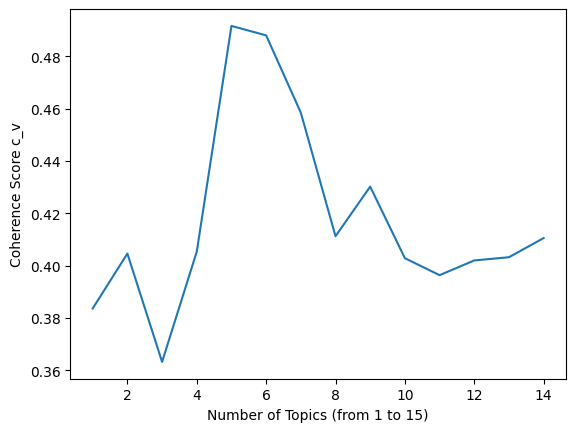

In [30]:
# creating lda object and choosing number of topics
hrp_lda_model = LDAModel(hrp_df)
hrp_lda_model.preprocess(custom_stopwords)  
hrp_lda_model.create_bow_model() 
hrp_lda_model.plot_optimal_coherent_scores() 

In [31]:
# number of topics = 5 another good example is 9 based on the c_v measure
hrp_lda_model.create_lda_model(5)

hrp_lda_model.format_topics_sentences()
hrp_df = hrp_lda_model.df
hrp_df.head()

INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 100 passes over the supplied corpus of 1157 documents, updating every 8000 documents, evaluating every ~1157 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.009*"doctor" + 0.008*"all" + 0.006*"high" + 0.006*"when" + 0.006*"could" + 0.006*"so" + 0.006*"you're" + 0.005*"health" + 0.005*"we" + 0.005*"diet"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"may" + 0.007*"my" + 0.006*"you're" + 0.005*"'" + 0.005*"one" + 0.005*"brain" + 0.005*"need" + 0.005*"this" + 0.005*"healthy" + 0.005

INFO:gensim.models.ldamodel:-7.076 per-word bound, 134.9 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.010*"doctor" + 0.010*"high" + 0.008*"all" + 0.008*"so" + 0.006*"they" + 0.006*"diet" + 0.006*"health" + 0.006*"we" + 0.006*"when" + 0.006*"you're"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.009*"my" + 0.008*"women" + 0.007*"you're" + 0.006*"one" + 0.006*"all" + 0.006*"this" + 0.006*"protein" + 0.006*"feel" + 0.006*"like" + 0.005*"don't"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.015*"brain" + 0.012*"healthy" + 0.008*"alcohol" + 0.006*"body" + 0.006*"sleep" + 0.006*"high" + 0.006*"pain" + 0.006*"low" + 0.006*"cause" + 0.005*"including"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.016*"thyroid" + 0.011*"disease" + 0.009*"need" + 0.008*"endometriosis" + 0.007*"doctor" +

INFO:gensim.models.ldamodel:topic #0 (0.200): 0.011*"high" + 0.010*"doctor" + 0.008*"so" + 0.008*"all" + 0.007*"they" + 0.007*"health" + 0.007*"diet" + 0.007*"hormone_therapy" + 0.006*"may" + 0.006*"could"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.009*"my" + 0.009*"women" + 0.008*"you're" + 0.007*"protein" + 0.007*"all" + 0.007*"one" + 0.006*"feel" + 0.006*"like" + 0.006*"this" + 0.006*"need"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.017*"brain" + 0.015*"healthy" + 0.009*"alcohol" + 0.009*"sleep" + 0.007*"body" + 0.006*"health" + 0.006*"metabolism" + 0.006*"including" + 0.006*"low" + 0.006*"high"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.018*"thyroid" + 0.013*"disease" + 0.010*"need" + 0.009*"endometriosis" + 0.008*"dose" + 0.007*"know" + 0.007*"pain" + 0.007*"how" + 0.007*"mg" + 0.007*"autoimmune"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.018*"'" + 0.012*"she" + 0.010*"her" + 0.010*"had" + 0.009*"was" + 0.009*"period" + 0.009*"periods" + 0.008*"you're" + 0.008*

INFO:gensim.models.ldamodel:topic #1 (0.200): 0.009*"women" + 0.009*"my" + 0.008*"protein" + 0.007*"you're" + 0.007*"all" + 0.007*"one" + 0.007*"feel" + 0.006*"like" + 0.006*"need" + 0.006*"this"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.018*"brain" + 0.016*"healthy" + 0.010*"sleep" + 0.009*"alcohol" + 0.007*"body" + 0.007*"metabolism" + 0.007*"health" + 0.006*"including" + 0.006*"reduce" + 0.006*"low"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.019*"thyroid" + 0.015*"disease" + 0.010*"need" + 0.009*"endometriosis" + 0.009*"dose" + 0.008*"know" + 0.008*"pain" + 0.007*"mg" + 0.007*"how" + 0.007*"autoimmune"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.020*"'" + 0.012*"she" + 0.011*"her" + 0.010*"was" + 0.010*"had" + 0.009*"periods" + 0.009*"you're" + 0.009*"period" + 0.009*"doctor" + 0.008*"so"
INFO:gensim.models.ldamodel:topic diff=0.045956, rho=0.226001
INFO:gensim.models.ldamodel:-6.987 per-word bound, 126.8 perplexity estimate based on a held-out corpus of 1157 document

INFO:gensim.models.ldamodel:topic #2 (0.200): 0.018*"brain" + 0.017*"healthy" + 0.011*"sleep" + 0.009*"alcohol" + 0.008*"body" + 0.008*"metabolism" + 0.007*"health" + 0.006*"low" + 0.006*"magnesium" + 0.006*"reduce"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.019*"thyroid" + 0.015*"disease" + 0.011*"need" + 0.010*"endometriosis" + 0.009*"dose" + 0.008*"pain" + 0.008*"know" + 0.008*"mg" + 0.008*"how" + 0.007*"autoimmune"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.020*"'" + 0.013*"she" + 0.011*"her" + 0.011*"was" + 0.010*"had" + 0.010*"you're" + 0.010*"periods" + 0.009*"period" + 0.009*"doctor" + 0.008*"could"
INFO:gensim.models.ldamodel:topic diff=0.031788, rho=0.197725
INFO:gensim.models.ldamodel:-6.973 per-word bound, 125.7 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 25, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.

INFO:gensim.models.ldamodel:topic #3 (0.200): 0.020*"thyroid" + 0.016*"disease" + 0.011*"need" + 0.010*"endometriosis" + 0.009*"dose" + 0.009*"pain" + 0.008*"know" + 0.008*"mg" + 0.008*"how" + 0.008*"cause"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.020*"'" + 0.013*"she" + 0.011*"her" + 0.011*"was" + 0.010*"had" + 0.010*"you're" + 0.010*"doctor" + 0.010*"periods" + 0.009*"period" + 0.008*"could"
INFO:gensim.models.ldamodel:topic diff=0.023668, rho=0.177953
INFO:gensim.models.ldamodel:-6.965 per-word bound, 124.9 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 31, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"high" + 0.011*"hormone_therapy" + 0.009*"doctor" + 0.008*"bone" + 0.007*"health" + 0.007*"so" + 0.007*"all" + 0.007*"only" + 0.007*"they" + 0.006*"may"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.010*"women" + 0.

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.020*"'" + 0.013*"she" + 0.011*"her" + 0.011*"was" + 0.010*"you're" + 0.010*"doctor" + 0.010*"had" + 0.010*"periods" + 0.009*"period" + 0.008*"could"
INFO:gensim.models.ldamodel:topic diff=0.017861, rho=0.163129
INFO:gensim.models.ldamodel:-6.959 per-word bound, 124.4 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 37, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"hormone_therapy" + 0.011*"high" + 0.009*"doctor" + 0.009*"bone" + 0.008*"health" + 0.007*"so" + 0.007*"all" + 0.007*"only" + 0.007*"testosterone" + 0.006*"may"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.010*"women" + 0.009*"my" + 0.008*"protein" + 0.008*"all" + 0.007*"you're" + 0.007*"feel" + 0.007*"need" + 0.007*"one" + 0.007*"we" + 0.007*"like"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.018*"brain" + 0.018*"

INFO:gensim.models.ldamodel:topic diff=0.014519, rho=0.151483
INFO:gensim.models.ldamodel:-6.954 per-word bound, 124.0 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 43, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"hormone_therapy" + 0.011*"high" + 0.009*"bone" + 0.009*"doctor" + 0.008*"health" + 0.007*"so" + 0.007*"only" + 0.007*"all" + 0.007*"testosterone" + 0.006*"progestin"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.011*"women" + 0.009*"my" + 0.008*"protein" + 0.008*"all" + 0.007*"you're" + 0.007*"feel" + 0.007*"need" + 0.007*"one" + 0.007*"we" + 0.007*"like"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.018*"healthy" + 0.018*"brain" + 0.012*"sleep" + 0.009*"alcohol" + 0.008*"histamine" + 0.008*"health" + 0.008*"low" + 0.008*"body" + 0.008*"metabolism" + 0.007*"magnesium"
INFO:gensim.models.ldamodel:topic #3 (0.2

INFO:gensim.models.ldamodel:-6.951 per-word bound, 123.7 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 49, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"hormone_therapy" + 0.011*"high" + 0.009*"bone" + 0.009*"doctor" + 0.008*"health" + 0.007*"only" + 0.007*"so" + 0.007*"all" + 0.007*"testosterone" + 0.007*"progestin"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.011*"women" + 0.009*"my" + 0.008*"protein" + 0.008*"all" + 0.007*"you're" + 0.007*"feel" + 0.007*"need" + 0.007*"one" + 0.007*"we" + 0.007*"like"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.018*"healthy" + 0.018*"brain" + 0.012*"sleep" + 0.009*"alcohol" + 0.008*"histamine" + 0.008*"low" + 0.008*"health" + 0.007*"metabolism" + 0.007*"body" + 0.007*"magnesium"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.020*"thyroid" + 0.017*"disease" + 0.011*"need" + 0.010*

INFO:gensim.models.ldamulticore:PROGRESS: pass 55, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"hormone_therapy" + 0.011*"high" + 0.010*"bone" + 0.009*"doctor" + 0.008*"health" + 0.008*"only" + 0.007*"so" + 0.007*"testosterone" + 0.007*"all" + 0.007*"progestin"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.011*"women" + 0.009*"my" + 0.008*"protein" + 0.008*"all" + 0.008*"you're" + 0.007*"feel" + 0.007*"need" + 0.007*"we" + 0.007*"one" + 0.007*"like"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.018*"healthy" + 0.018*"brain" + 0.012*"sleep" + 0.009*"histamine" + 0.009*"alcohol" + 0.008*"low" + 0.008*"health" + 0.007*"metabolism" + 0.007*"body" + 0.007*"sensitivity"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.021*"thyroid" + 0.017*"disease" + 0.011*"need" + 0.010*"endometriosis" + 0.010*"dose" + 0.009*"pain" + 0.009*"know" + 0.008*"cause" + 0.008*"mg" + 0.008*"how"
INFO:gensim.models.ldamodel:topic

INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"hormone_therapy" + 0.011*"high" + 0.010*"bone" + 0.009*"doctor" + 0.008*"health" + 0.008*"only" + 0.007*"testosterone" + 0.007*"so" + 0.007*"all" + 0.007*"progestin"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.011*"women" + 0.009*"my" + 0.008*"protein" + 0.008*"all" + 0.008*"you're" + 0.007*"feel" + 0.007*"need" + 0.007*"we" + 0.007*"one" + 0.007*"like"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.018*"healthy" + 0.018*"brain" + 0.012*"sleep" + 0.009*"histamine" + 0.009*"alcohol" + 0.008*"low" + 0.008*"health" + 0.007*"metabolism" + 0.007*"body" + 0.007*"sensitivity"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.021*"thyroid" + 0.017*"disease" + 0.012*"need" + 0.010*"endometriosis" + 0.010*"dose" + 0.009*"pain" + 0.009*"know" + 0.008*"cause" + 0.008*"mg" + 0.008*"how"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.019*"'" + 0.012*"she" + 0.011*"her" + 0.011*"was" + 0.010*"you're" + 0.010*"doctor" + 0.009*"had" + 0.009*"peri

INFO:gensim.models.ldamodel:topic #1 (0.200): 0.011*"women" + 0.009*"my" + 0.008*"protein" + 0.008*"all" + 0.008*"you're" + 0.007*"feel" + 0.007*"need" + 0.007*"like" + 0.007*"we" + 0.007*"one"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.019*"healthy" + 0.018*"brain" + 0.012*"sleep" + 0.009*"histamine" + 0.009*"alcohol" + 0.008*"low" + 0.008*"health" + 0.007*"metabolism" + 0.007*"sensitivity" + 0.007*"body"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.021*"thyroid" + 0.017*"disease" + 0.012*"need" + 0.010*"endometriosis" + 0.010*"dose" + 0.009*"pain" + 0.009*"know" + 0.009*"cause" + 0.008*"mg" + 0.008*"how"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.019*"'" + 0.012*"she" + 0.011*"her" + 0.011*"was" + 0.010*"you're" + 0.010*"doctor" + 0.009*"had" + 0.009*"periods" + 0.009*"period" + 0.008*"could"
INFO:gensim.models.ldamodel:topic diff=0.006867, rho=0.120755
INFO:gensim.models.ldamodel:-6.943 per-word bound, 123.0 perplexity estimate based on a held-out corpus of 1157 documen

INFO:gensim.models.ldamodel:topic #2 (0.200): 0.019*"healthy" + 0.018*"brain" + 0.012*"sleep" + 0.009*"histamine" + 0.009*"alcohol" + 0.008*"low" + 0.008*"health" + 0.007*"sensitivity" + 0.007*"metabolism" + 0.007*"body"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.021*"thyroid" + 0.018*"disease" + 0.012*"need" + 0.010*"endometriosis" + 0.010*"dose" + 0.009*"pain" + 0.009*"know" + 0.009*"cause" + 0.008*"mg" + 0.008*"how"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.019*"'" + 0.012*"she" + 0.012*"her" + 0.011*"was" + 0.010*"you're" + 0.010*"doctor" + 0.009*"had" + 0.009*"periods" + 0.009*"period" + 0.008*"could"
INFO:gensim.models.ldamodel:topic diff=0.006061, rho=0.115796
INFO:gensim.models.ldamodel:-6.941 per-word bound, 122.9 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 74, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.

INFO:gensim.models.ldamodel:topic #3 (0.200): 0.021*"thyroid" + 0.018*"disease" + 0.012*"need" + 0.010*"endometriosis" + 0.010*"dose" + 0.009*"pain" + 0.009*"know" + 0.009*"cause" + 0.008*"mg" + 0.008*"how"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.019*"'" + 0.012*"she" + 0.012*"her" + 0.011*"was" + 0.010*"you're" + 0.010*"doctor" + 0.009*"had" + 0.009*"periods" + 0.009*"period" + 0.008*"could"
INFO:gensim.models.ldamodel:topic diff=0.005361, rho=0.111401
INFO:gensim.models.ldamodel:-6.940 per-word bound, 122.8 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 80, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"hormone_therapy" + 0.011*"high" + 0.010*"bone" + 0.009*"doctor" + 0.008*"only" + 0.008*"health" + 0.007*"testosterone" + 0.007*"so" + 0.007*"progestin" + 0.007*"all"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.01

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.019*"'" + 0.012*"she" + 0.012*"her" + 0.011*"was" + 0.010*"you're" + 0.010*"doctor" + 0.009*"had" + 0.009*"periods" + 0.009*"period" + 0.008*"could"
INFO:gensim.models.ldamodel:topic diff=0.004740, rho=0.107472
INFO:gensim.models.ldamodel:-6.939 per-word bound, 122.7 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 86, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"hormone_therapy" + 0.011*"high" + 0.010*"bone" + 0.009*"doctor" + 0.009*"only" + 0.008*"health" + 0.007*"testosterone" + 0.007*"progestin" + 0.007*"so" + 0.007*"all"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.011*"women" + 0.009*"my" + 0.009*"protein" + 0.008*"all" + 0.008*"you're" + 0.007*"feel" + 0.007*"like" + 0.007*"need" + 0.007*"one" + 0.007*"we"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.019*"healthy" +

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.019*"'" + 0.012*"she" + 0.012*"her" + 0.011*"was" + 0.010*"you're" + 0.010*"doctor" + 0.009*"had" + 0.009*"periods" + 0.009*"period" + 0.008*"could"
INFO:gensim.models.ldamodel:topic diff=0.004158, rho=0.103931
INFO:gensim.models.ldamodel:-6.938 per-word bound, 122.6 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 92, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"hormone_therapy" + 0.011*"high" + 0.010*"bone" + 0.009*"only" + 0.009*"doctor" + 0.008*"health" + 0.007*"testosterone" + 0.007*"progestin" + 0.007*"so" + 0.007*"may"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.011*"women" + 0.009*"my" + 0.009*"protein" + 0.008*"all" + 0.008*"you're" + 0.007*"feel" + 0.007*"like" + 0.007*"need" + 0.007*"one" + 0.007*"we"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.019*"healthy" +

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.019*"'" + 0.012*"she" + 0.012*"her" + 0.011*"was" + 0.010*"you're" + 0.010*"doctor" + 0.009*"had" + 0.009*"periods" + 0.009*"period" + 0.008*"could"
INFO:gensim.models.ldamodel:topic diff=0.003734, rho=0.100718
INFO:gensim.models.ldamodel:-6.937 per-word bound, 122.5 perplexity estimate based on a held-out corpus of 1157 documents with 34788 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 98, dispatched chunk #0 = documents up to #1157/1157, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"hormone_therapy" + 0.011*"high" + 0.010*"bone" + 0.009*"only" + 0.009*"doctor" + 0.008*"health" + 0.007*"testosterone" + 0.007*"progestin" + 0.007*"may" + 0.007*"so"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.011*"women" + 0.009*"my" + 0.009*"protein" + 0.008*"all" + 0.008*"you're" + 0.007*"feel" + 0.007*"like" + 0.007*"need" + 0.007*"one" + 0.007*"we"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.019*"healthy" +

,book,chapter,paragraph_number,paragraph,tokens,processed,dominant_topic,perc_contribution,topic_keywords
0,Hormone Repair Manual,1,1,Hormone revolution:\n\n\n\n\n\nwhy everything ...,"[hormone, revolution, why, everything, is, dif...","[hormone, why, everything, different, after, s...",4,0.5203,"', she, her, was, you're, doctor, had, periods..."
1,Hormone Repair Manual,1,2,This book is about both the process of perimen...,"[this, book, is, about, both, the, process, of...","[this, book, both, process, life_phase, togeth...",1,0.9571,"women, my, protein, all, you're, feel, like, n..."
2,Hormone Repair Manual,1,3,"First, understand that symptoms (if you experi...","[first, understand, that, symptoms, if, you, e...","[first, understand, experience, them, likely, ...",4,0.9688,"', she, her, was, you're, doctor, had, periods..."
3,Hormone Repair Manual,1,4,"Next, understand that perimenopause is not jus...","[next, understand, that, perimenopause, is, no...","[next, understand, just, sequence, events, beg...",4,0.7479,"', she, her, was, you're, doctor, had, periods..."
4,Hormone Repair Manual,1,5,"Finally, know that perimenopause and the early...","[finally, know, that, perimenopause, and, the,...","[finally, know, early, years, critical_window,...",0,0.8442,"hormone_therapy, high, bone, only, doctor, hea..."


In [33]:
hrp_sentiment_model = Sentiment(hrp_df)
hrp_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
hrp_sentiment_model.df.head()

INFO:root:loading sentiments from already exported file:
	out/sentiment.csv
INFO:root:left join done and sentiments are loaded - check: 1157==1157?


,book,chapter,paragraph_number,paragraph,tokens,processed,dominant_topic,perc_contribution,topic_keywords,sentiment,processed_text
0,Hormone Repair Manual,1,1,Hormone revolution:\n\n\n\n\n\nwhy everything ...,"[hormone, revolution, why, everything, is, dif...","[revolution, everything, second, you've, picke...",2,0.7969,"talk, i'd, thought, got, said, bit, thing, sto...",POSITIVE,revolution everything second you've picked cha...
1,Hormone Repair Manual,1,2,This book is about both the process of perimen...,"[this, book, is, about, both, the, process, of...","[process, phase, together, four, decades, unde...",3,0.6416,"ovaries, testosterone, vagina, estradiol, uter...",POSITIVE,process phase together four decades understand
2,Hormone Repair Manual,1,3,"First, understand that symptoms (if you experi...","[first, understand, that, symptoms, if, you, e...","[understand, temporary, perimenopausal, tempor...",5,0.5017,"works, histamine, magnesium, migraines, page, ...",POSITIVE,understand temporary perimenopausal temporary ...
3,Hormone Repair Manual,1,4,"Next, understand that perimenopause is not jus...","[next, understand, that, perimenopause, is, no...","[next, understand, sequence, events, beginning...",3,0.8401,"ovaries, testosterone, vagina, estradiol, uter...",NEGATIVE,next understand sequence events beginning pair...
4,Hormone Repair Manual,1,5,"Finally, know that perimenopause and the early...","[finally, know, that, perimenopause, and, the,...","[finally, critical_window, true, critical_wind...",5,0.9663,"works, histamine, magnesium, migraines, page, ...",POSITIVE,finally critical_window true critical_window m...


In [71]:
hrp_sentiment_model.export_to_csv('out/sentiments_hrp.csv')

INFO:root:file is writen successfully


INFO:root:chapter-topic treemap html is saved in: 
	figures/hrp_chapter_topic.html
INFO:root:topic-sentiment treemap html is saved in: 
	figures/hrp_topic_sentment.html


{'(?)': 'lightgrey', '4': '#fd7f6f', '1': '#7eb0d5', '0': '#b2e061', '3': '#bd7ebe', '2': '#ffb55a'}


INFO:root:pyvis html visualization is saved in: 
	figures/hrp_pyvis_topics.html
/Users/ehsanhamzei/opt/anaconda3/envs/lda_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

INFO:root:wordclouds are generated and saved in:	figures/hrp_wordclouds.svg


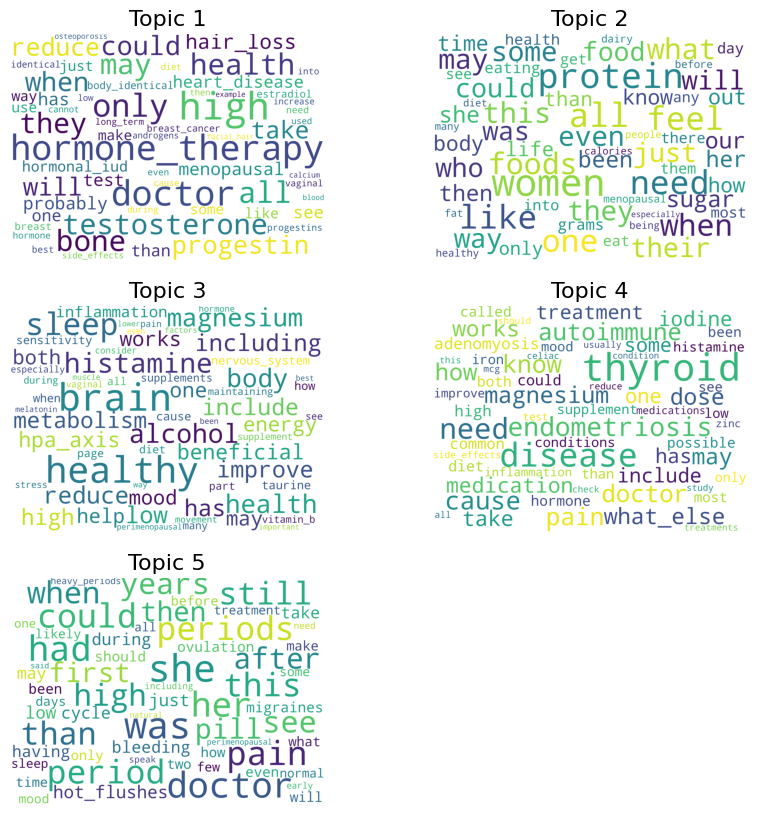

In [35]:
hrp_vis = Vis(sentiment=hrp_sentiment_model, lda=hrp_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

hrp_vis.treemap_chapter_topic('figures/hrp_chapter_topic.html')  # treemap of chapter -> topics
hrp_vis.treemap_topic_sentiment('figures/hrp_topic_sentment.html')  # treemap of topics -> sentiments
hrp_vis.pyviz_topics('figures/hrp_pyvis_topics.html')  # pyVis topic analysis
hrp_vis.generate_topics_wordcloud('figures/hrp_wordclouds.svg')

### 2. Next Level

In [88]:
nl_df = bookshelf.create_corpus_custom_df(nl_book_name)
nl_df = nl_df.reset_index()
nl_df.head()

,index,book,chapter,paragraph_number,paragraph
0,1157,Next Level,1,1,THE STATS. THE STIGMA. THE SILENCE.How we thin...
1,1158,Next Level,1,2,"When you look at it that way, it's all the mor..."
2,1159,Next Level,1,3,The Puritan times weren't much better. If you ...
3,1160,Next Level,1,4,Menopause finally surfaced as a recognized med...
4,1161,Next Level,1,5,Things didn't really get much better even in w...


INFO:root:Preprocessor initiated...
INFO:root:	All paragraph are normalized by removing unwanted characters
INFO:root:	tokenization and initial preprocessing is done
INFO:root:	word count is done:
INFO:root:		{'the': 2582, 'we': 220, 'and': 2598, 'menopause': 218, 'for': 775, 'women': 488, 'is': 860, 'at': 253, 'which': 249, 'in': 1190, 'of': 1683, 'your': 1682, 'to': 2162, 'when': 315, 'you': 1297, 'be': 272, 'if': 287, 'not': 322, 'more': 413, 'on': 476, 'some': 222, 'it': 501, 'that': 1056, 'all': 152, 'as': 642, 'a': 1533, 'she': 266, 'they': 235, 'with': 618, 'or': 415, 'so': 311, 'but': 291, 'also': 302, 'up': 262, 'body': 363, 'get': 198, 'what': 158, 'into': 171, 'this': 306, 'their': 209, 'from': 232, 'have': 332, 'can': 573, 'like': 238, 'do': 193, 'are': 496, 'her': 298, 'one': 159, 'than': 169, 'an': 207, 'levels': 171, 'during': 164, 'exercise': 199, 'out': 160, 'need': 201, 'by': 203, "you're": 241, 'day': 180, 'because': 168, 'estrogen': 166, 'fat': 155, 'training': 202,

preprocessing workflow started...


INFO:gensim.models.phrases:exporting phrases from Phrases<47554 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
INFO:gensim.utils:FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<86 phrases, min_count=5, threshold=100> from Phrases<47554 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.04s', 'datetime': '2023-06-11T15:25:40.224149', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:root:analyzing bigrams and trigrams
INFO:root:	Preprocessing done...

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<1607 unique tokens: ['about', 'after', 'average_age', 'could', 'easily']...> from 981 documents (total 35164 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<1607 unique tokens: ['about', 'after', 'average_age', 'could', 'easi

INFO:gensim.models.ldamodel:using symmetric eta at 0.5
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 2 topics, 10 passes over the supplied corpus of 981 documents, updating every 16000 documents, evaluating every ~981 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.006*"exercise" + 0.006*"get" + 0.006*"day" + 0.005*"do" + 0.005*"into" + 0.005*"one" + 0.005*"fat" + 0.005*"out" + 0.005*"because" + 0.004*"protein"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.006*"estrogen" + 0.005*"get" + 0.005*"do" + 0.005*"levels" + 0.005*"exercise" + 0.005*"sleep" + 0.005*"during" + 0.005*"what" + 0.005*"because" + 0.005*"about"
INFO:gensim.models.ldamodel:topic diff

INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 1018 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.3333333333333333
INFO:gensim.models.ldamodel:using symmetric eta at 0.3333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 3 topics, 10 passes over the supplied corpus of 981 documents, updating every 16000 documents, evaluating every ~981 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.006*"exercise" + 0.006*"fat" + 0.006*"get" + 0.005*"into" + 0.005*"day" + 0.005*"do" + 0.005*"one" + 0.005*"out" + 0.005

INFO:gensim.models.ldamodel:topic #0 (0.333): 0.012*"protein" + 0.010*"back" + 0.009*"into" + 0.008*"exercise" + 0.007*"do" + 0.006*"fat" + 0.006*"down" + 0.006*"muscles" + 0.006*"day" + 0.006*"out"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.012*"estrogen" + 0.009*"levels" + 0.009*"symptoms" + 0.009*"sleep" + 0.007*"help" + 0.007*"during" + 0.006*"menopausal" + 0.006*"what" + 0.006*"get" + 0.006*"our"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.008*"day" + 0.007*"percent" + 0.007*"who" + 0.007*"one" + 0.006*"health" + 0.006*"than" + 0.006*"exercise" + 0.006*"was" + 0.005*"energy" + 0.005*"just"
INFO:gensim.models.ldamodel:topic diff=0.092462, rho=0.324605
INFO:gensim.models.ldamodel:-6.946 per-word bound, 123.3 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.013*"protein" + 0.

INFO:gensim.models.ldamodel:topic diff=0.197877, rho=0.426770
INFO:gensim.models.ldamodel:-7.066 per-word bound, 134.0 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"protein" + 0.009*"back" + 0.009*"into" + 0.008*"fat" + 0.008*"do" + 0.007*"day" + 0.007*"down" + 0.006*"exercise" + 0.006*"out" + 0.006*"grams"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.015*"estrogen" + 0.012*"levels" + 0.009*"symptoms" + 0.007*"during" + 0.007*"progesterone" + 0.006*"hormone" + 0.006*"than" + 0.005*"make" + 0.005*"menopausal" + 0.005*"get"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.008*"percent" + 0.008*"who" + 0.008*"day" + 0.008*"one" + 0.007*"than" + 0.006*"i" + 0.006*"was" + 0.006*"weight" + 0.006*"get" + 0.006*"health"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.010*"help" + 0.01

INFO:gensim.models.ldamodel:topic diff=0.756546, rho=1.000000
INFO:gensim.models.ldamodel:-7.430 per-word bound, 172.5 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.008*"protein" + 0.008*"fat" + 0.007*"day" + 0.006*"back" + 0.006*"out" + 0.006*"get" + 0.006*"exercise" + 0.005*"one" + 0.005*"into" + 0.005*"do"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.008*"estrogen" + 0.007*"sleep" + 0.007*"levels" + 0.006*"symptoms" + 0.006*"what" + 0.006*"get" + 0.006*"i" + 0.006*"during" + 0.005*"about" + 0.005*"do"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.007*"day" + 0.007*"get" + 0.006*"one" + 0.005*"do" + 0.005*"who" + 0.005*"i" + 0.005*"has" + 0.005*"about" + 0.005*"weight" + 0.005*"percent"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.008*"exercise" + 0.007*"help" + 0.007*"do" 

INFO:gensim.models.ldamodel:topic #0 (0.200): 0.018*"protein" + 0.013*"back" + 0.009*"day" + 0.008*"into" + 0.007*"fat" + 0.007*"grams" + 0.007*"right" + 0.007*"do" + 0.007*"then" + 0.007*"down"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.019*"estrogen" + 0.011*"levels" + 0.010*"symptoms" + 0.008*"sleep" + 0.008*"progesterone" + 0.007*"muscles" + 0.007*"hormone" + 0.007*"hormones" + 0.007*"during" + 0.006*"menopausal"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.009*"day" + 0.009*"one" + 0.008*"who" + 0.008*"i" + 0.008*"percent" + 0.007*"was" + 0.007*"get" + 0.007*"has" + 0.006*"after" + 0.006*"been"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.012*"help" + 0.009*"sleep" + 0.009*"exercise" + 0.009*"what" + 0.008*"do" + 0.007*"other" + 0.007*"brain" + 0.007*"get" + 0.007*"energy" + 0.007*"important"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.011*"gut" + 0.011*"than" + 0.009*"health" + 0.008*"risk" + 0.007*"percent" + 0.007*"who" + 0.007*"exercise" + 0.007*"levels" + 0.006

INFO:gensim.models.ldamodel:topic #0 (0.167): 0.011*"protein" + 0.010*"fat" + 0.008*"back" + 0.006*"grams" + 0.006*"out" + 0.006*"day" + 0.006*"into" + 0.006*"exercise" + 0.006*"one" + 0.005*"down"
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.007*"percent" + 0.007*"day" + 0.007*"who" + 0.006*"one" + 0.006*"get" + 0.006*"has" + 0.006*"menopausal" + 0.005*"than" + 0.005*"about" + 0.005*"weight"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.008*"gut" + 0.007*"than" + 0.007*"into" + 0.006*"health" + 0.006*"because" + 0.006*"exercise" + 0.006*"was" + 0.005*"sodium" + 0.005*"who" + 0.005*"it's"
INFO:gensim.models.ldamodel:topic diff=0.358290, rho=0.535249
INFO:gensim.models.ldamodel:-7.242 per-word bound, 151.4 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.010*"gut" + 0.008*"than" + 0

INFO:gensim.models.ldamodel:topic #2 (0.167): 0.012*"percent" + 0.012*"who" + 0.010*"one" + 0.008*"than" + 0.008*"age" + 0.008*"been" + 0.007*"bone" + 0.007*"day" + 0.007*"had" + 0.006*"was"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.023*"protein" + 0.012*"back" + 0.012*"fat" + 0.010*"grams" + 0.009*"day" + 0.007*"exercise" + 0.007*"down" + 0.007*"lifting" + 0.007*"recovery" + 0.007*"do"
INFO:gensim.models.ldamodel:topic diff=0.203364, rho=0.324605
INFO:gensim.models.ldamodel:-7.005 per-word bound, 128.5 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.012*"help" + 0.012*"energy" + 0.010*"what" + 0.009*"because" + 0.009*"important" + 0.008*"brain" + 0.008*"exercise" + 0.008*"i" + 0.007*"health" + 0.007*"symptoms"
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.015*"gut" + 0.008*"th

INFO:gensim.models.ldamodel:topic diff=0.427426, rho=0.471903
INFO:gensim.models.ldamodel:-7.173 per-word bound, 144.3 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.013*"gut" + 0.011*"than" + 0.009*"health" + 0.008*"who" + 0.007*"percent" + 0.007*"risk" + 0.006*"bone" + 0.006*"was" + 0.006*"into" + 0.006*"exercise"
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.011*"help" + 0.010*"what" + 0.008*"exercise" + 0.008*"energy" + 0.008*"brain" + 0.007*"important" + 0.007*"it's" + 0.007*"other" + 0.007*"do" + 0.006*"just"
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.014*"fat" + 0.010*"exercise" + 0.008*"out" + 0.008*"day" + 0.007*"muscles" + 0.007*"blood" + 0.007*"recovery" + 0.006*"into" + 0.006*"protein" + 0.006*"get"
INFO:gensim.models.ldamodel:topic #6 (0.143): 0.019*"protein" + 0.0

INFO:gensim.models.ldamodel:-6.991 per-word bound, 127.2 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1522, num_topics=7, decay=0.5, chunksize=2000> in 4.33s', 'datetime': '2023-06-11T15:26:15.577845', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 1018 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.125
INFO:gensim.models.ldamodel:using symmetric eta at 0.125
INFO:gensim.models.ldamodel:using serial LDA version on

INFO:gensim.models.ldamodel:topic #4 (0.125): 0.014*"than" + 0.014*"gut" + 0.011*"percent" + 0.008*"was" + 0.008*"who" + 0.007*"risk" + 0.007*"sodium" + 0.007*"health" + 0.006*"had" + 0.006*"study"
INFO:gensim.models.ldamodel:topic #5 (0.125): 0.014*"back" + 0.011*"do" + 0.008*"work" + 0.008*"floor" + 0.007*"into" + 0.007*"then" + 0.007*"hard" + 0.007*"right" + 0.007*"get" + 0.007*"easy"
INFO:gensim.models.ldamodel:topic #0 (0.125): 0.024*"protein" + 0.010*"grams" + 0.009*"get" + 0.009*"fat" + 0.009*"exercise" + 0.007*"eat" + 0.007*"day" + 0.006*"down" + 0.006*"out" + 0.006*"because"
INFO:gensim.models.ldamodel:topic #3 (0.125): 0.012*"help" + 0.011*"energy" + 0.010*"symptoms" + 0.010*"brain" + 0.009*"health" + 0.009*"exercise" + 0.009*"what" + 0.009*"other" + 0.007*"during" + 0.007*"mht"
INFO:gensim.models.ldamodel:topic diff=0.420924, rho=0.392519
INFO:gensim.models.ldamodel:-7.114 per-word bound, 138.5 perplexity estimate based on a held-out corpus of 981 documents with 34708 words


INFO:gensim.models.ldamodel:topic #7 (0.111): 0.008*"day" + 0.007*"sleep" + 0.006*"than" + 0.006*"get" + 0.006*"exercise" + 0.005*"do" + 0.005*"back" + 0.005*"because" + 0.005*"into" + 0.005*"especially"
INFO:gensim.models.ldamodel:topic #2 (0.111): 0.006*"get" + 0.006*"day" + 0.006*"levels" + 0.005*"percent" + 0.005*"one" + 0.005*"estrogen" + 0.005*"menopausal" + 0.005*"do" + 0.005*"has" + 0.005*"about"
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.008*"exercise" + 0.007*"help" + 0.006*"do" + 0.005*"all" + 0.005*"what" + 0.005*"it's" + 0.005*"other" + 0.005*"into" + 0.005*"get" + 0.005*"levels"
INFO:gensim.models.ldamodel:topic diff=0.928579, rho=1.000000
INFO:gensim.models.ldamodel:-7.851 per-word bound, 230.8 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #4 (0.111): 0.008*"than" + 0.008*"into

INFO:gensim.models.ldamodel:topic #6 (0.111): 0.018*"protein" + 0.015*"diet" + 0.013*"foods" + 0.008*"leucine" + 0.007*"these" + 0.007*"i" + 0.006*"get" + 0.006*"good" + 0.006*"should" + 0.006*"eating"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.012*"fat" + 0.010*"into" + 0.009*"sleep" + 0.009*"weight" + 0.008*"energy" + 0.008*"much" + 0.008*"especially" + 0.007*"because" + 0.007*"composition" + 0.006*"too"
INFO:gensim.models.ldamodel:topic diff=0.435856, rho=0.365380
INFO:gensim.models.ldamodel:-7.084 per-word bound, 135.7 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.111): 0.018*"protein" + 0.011*"day" + 0.010*"fat" + 0.009*"exercise" + 0.009*"grams" + 0.009*"recovery" + 0.007*"blood" + 0.007*"muscles" + 0.007*"get" + 0.006*"out"
INFO:gensim.models.ldamodel:topic #2 (0.111): 0.014*"age

INFO:gensim.models.ldamodel:topic diff=0.557841, rho=0.633661
INFO:gensim.models.ldamodel:-7.627 per-word bound, 197.7 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #2 (0.100): 0.009*"one" + 0.008*"day" + 0.007*"get" + 0.007*"has" + 0.006*"been" + 0.006*"about" + 0.005*"levels" + 0.005*"weight" + 0.005*"who" + 0.005*"percent"
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.011*"help" + 0.007*"brain" + 0.007*"exercise" + 0.007*"other" + 0.006*"during" + 0.006*"important" + 0.006*"estrogen" + 0.006*"symptoms" + 0.006*"do" + 0.006*"energy"
INFO:gensim.models.ldamodel:topic #9 (0.100): 0.018*"protein" + 0.012*"exercise" + 0.012*"grams" + 0.008*"recovery" + 0.007*"out" + 0.007*"leucine" + 0.007*"it's" + 0.006*"may" + 0.006*"day" + 0.006*"right"
INFO:gensim.models.ldamodel:topic #4 (0.100): 0.013*"gut" 

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.015*"help" + 0.012*"symptoms" + 0.010*"brain" + 0.009*"mht" + 0.009*"hot_flashes" + 0.008*"what" + 0.008*"during" + 0.008*"energy" + 0.007*"menopausal" + 0.007*"other"
INFO:gensim.models.ldamodel:topic #9 (0.100): 0.045*"protein" + 0.020*"grams" + 0.014*"exercise" + 0.013*"recovery" + 0.012*"leucine" + 0.009*"day" + 0.008*"out" + 0.007*"carbs" + 0.007*"synthesis" + 0.007*"amino_acids"
INFO:gensim.models.ldamodel:topic #8 (0.100): 0.025*"back" + 0.015*"floor" + 0.012*"right" + 0.012*"hips" + 0.011*"side" + 0.011*"repeat" + 0.010*"knees" + 0.010*"arms" + 0.010*"into" + 0.010*"feet"
INFO:gensim.models.ldamodel:topic #4 (0.100): 0.021*"gut" + 0.014*"than" + 0.011*"percent" + 0.010*"who" + 0.009*"sodium" + 0.009*"health" + 0.008*"study" + 0.008*"bacteria" + 0.007*"drink" + 0.007*"into"
INFO:gensim.models.ldamodel:topic #2 

INFO:gensim.models.ldamodel:topic #4 (0.091): 0.011*"gut" + 0.010*"than" + 0.009*"health" + 0.009*"percent" + 0.007*"foods" + 0.007*"was" + 0.007*"risk" + 0.006*"diet" + 0.006*"who" + 0.005*"sodium"
INFO:gensim.models.ldamodel:topic #9 (0.091): 0.029*"protein" + 0.017*"grams" + 0.011*"exercise" + 0.009*"day" + 0.009*"leucine" + 0.008*"endurance" + 0.007*"recovery" + 0.007*"strength" + 0.007*"how" + 0.006*"do"
INFO:gensim.models.ldamodel:topic #3 (0.091): 0.011*"help" + 0.010*"symptoms" + 0.009*"energy" + 0.008*"brain" + 0.008*"exercise" + 0.008*"hormones" + 0.007*"what" + 0.007*"important" + 0.007*"other" + 0.007*"mht"
INFO:gensim.models.ldamodel:topic #5 (0.091): 0.012*"sleep" + 0.011*"do" + 0.010*"day" + 0.010*"get" + 0.009*"work" + 0.008*"after" + 0.008*"easy" + 0.008*"all" + 0.007*"hard" + 0.007*"i"
INFO:gensim.models.ldamodel:topic diff=0.746554, rho=0.471903
INFO:gensim.models.ldamodel:-7.335 per-word bound, 161.5 perplexity estimate based on a held-out corpus of 981 documents wi

INFO:gensim.models.ldamodel:topic #0 (0.091): 0.031*"fat" + 0.013*"muscles" + 0.010*"exercise" + 0.010*"into" + 0.009*"energy" + 0.009*"get" + 0.009*"stress" + 0.008*"will" + 0.008*"composition" + 0.008*"want"
INFO:gensim.models.ldamodel:topic #7 (0.091): 0.036*"sleep" + 0.011*"day" + 0.009*"muscles" + 0.009*"into" + 0.008*"recovery" + 0.007*"may" + 0.007*"down" + 0.006*"especially" + 0.006*"melatonin" + 0.006*"blood"
INFO:gensim.models.ldamodel:topic #5 (0.091): 0.014*"day" + 0.014*"hard" + 0.014*"work" + 0.014*"do" + 0.013*"easy" + 0.013*"session" + 0.010*"after" + 0.009*"all" + 0.009*"get" + 0.009*"then"
INFO:gensim.models.ldamodel:topic diff=0.343769, rho=0.308746
INFO:gensim.models.ldamodel:-7.072 per-word bound, 134.6 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=1522, num_topics=11, decay=0.5, chunksize=2000> in 8.36s', 'datetime': '2023-06-11T15:26:42.470148

INFO:gensim.models.ldamodel:topic #2 (0.083): 0.014*"who" + 0.013*"percent" + 0.010*"day" + 0.010*"one" + 0.009*"study" + 0.009*"been" + 0.008*"menopausal" + 0.008*"health" + 0.008*"than" + 0.008*"she's"
INFO:gensim.models.ldamodel:topic diff=0.775166, rho=0.426770
INFO:gensim.models.ldamodel:-7.291 per-word bound, 156.6 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #4 (0.083): 0.018*"gut" + 0.013*"sodium" + 0.011*"than" + 0.010*"percent" + 0.009*"health" + 0.009*"drink" + 0.009*"exercise" + 0.009*"fluid" + 0.008*"hydration" + 0.007*"during"
INFO:gensim.models.ldamodel:topic #7 (0.083): 0.012*"bone" + 0.010*"vitamin_d" + 0.009*"iron" + 0.008*"especially" + 0.008*"too" + 0.008*"because" + 0.007*"muscles" + 0.007*"bones" + 0.007*"osteoporosis" + 0.007*"levels"
INFO:gensim.models.ldamodel:topic #11 (

INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #8 (0.077): 0.008*"was" + 0.007*"get" + 0.005*"our" + 0.005*"during" + 0.005*"fat" + 0.005*"sleep" + 0.005*"day" + 0.005*"down" + 0.005*"menopausal" + 0.005*"i"
INFO:gensim.models.ldamodel:topic #10 (0.077): 0.006*"exercise" + 0.006*"who" + 0.005*"protein" + 0.005*"sleep" + 0.005*"day" + 0.005*"do" + 0.005*"what" + 0.005*"help" + 0.005*"levels" + 0.005*"don't"
INFO:gensim.models.ldamodel:topic #12 (0.077): 0.008*"estrogen" + 0.007*"into" + 0.007*"sleep" + 0.006*"help" + 0.006*"about" + 0.006*"back" + 0.006*"get" + 0.005*"protein" + 0.005*"energy" + 0.005*"than"
INFO:gensim.models.ldamodel:topic #6 (0.077): 0.007*"what" + 0.007*"do" + 0.006*"exercise" + 0.006*"day" + 0.006*"may" + 0.005*"just" + 0.005*"protein" + 0.005*"all" + 0.005*"one" + 0.005*"those"
INFO:gensi

INFO:gensim.models.ldamodel:topic #1 (0.077): 0.023*"levels" + 0.021*"estrogen" + 0.020*"progesterone" + 0.011*"blood" + 0.011*"symptoms" + 0.011*"hormone" + 0.011*"years" + 0.010*"during" + 0.009*"hormones" + 0.009*"inflammation"
INFO:gensim.models.ldamodel:topic #11 (0.077): 0.012*"about" + 0.012*"day" + 0.010*"sleep" + 0.009*"during" + 0.007*"has" + 0.007*"because" + 0.007*"into" + 0.007*"one" + 0.007*"caffeine" + 0.006*"coffee"
INFO:gensim.models.ldamodel:topic #3 (0.077): 0.012*"what" + 0.011*"important" + 0.011*"health" + 0.010*"help" + 0.010*"symptoms" + 0.009*"exercise" + 0.009*"it's" + 0.008*"menopausal" + 0.008*"other" + 0.008*"because"
INFO:gensim.models.ldamodel:topic #2 (0.077): 0.012*"bone" + 0.010*"one" + 0.010*"age" + 0.010*"been" + 0.009*"should" + 0.009*"menopausal" + 0.008*"health" + 0.008*"i" + 0.007*"get" + 0.007*"who"
INFO:gensim.models.ldamodel:topic #4 (0.077): 0.018*"gut" + 0.013*"than" + 0.010*"percent" + 0.009*"sodium" + 0.008*"diet" + 0.008*"foods" + 0.008*"

INFO:gensim.models.ldamodel:topic #10 (0.071): 0.009*"who" + 0.008*"exercise" + 0.006*"do" + 0.006*"than" + 0.006*"recovery" + 0.006*"study" + 0.005*"one" + 0.005*"after" + 0.005*"high" + 0.005*"time"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.010*"floor" + 0.009*"back" + 0.009*"was" + 0.007*"get" + 0.006*"down" + 0.006*"knees" + 0.006*"i" + 0.006*"our" + 0.006*"feel" + 0.005*"stress"
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.010*"day" + 0.010*"was" + 0.009*"into" + 0.008*"i" + 0.007*"out" + 0.006*"than" + 0.005*"just" + 0.005*"all" + 0.005*"it's" + 0.005*"muscles"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.010*"help" + 0.008*"exercise" + 0.008*"what" + 0.007*"brain" + 0.007*"do" + 0.006*"health" + 0.006*"it's" + 0.006*"other" + 0.006*"just" + 0.006*"menopausal"
INFO:gensim.models.ldamodel:topic diff=0.941511, rho=0.633661
INFO:gensim.models.ldamodel:-7.841 per-word bound, 229.4 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensi

INFO:gensim.models.ldamodel:topic #12 (0.071): 0.026*"estrogen" + 0.013*"sleep" + 0.012*"helps" + 0.011*"hot_flashes" + 0.010*"hormone" + 0.010*"levels" + 0.009*"help" + 0.009*"e" + 0.008*"function" + 0.007*"serotonin"
INFO:gensim.models.ldamodel:topic #11 (0.071): 0.012*"about" + 0.011*"our" + 0.011*"sleep" + 0.010*"through" + 0.010*"it's" + 0.009*"even" + 0.009*"during" + 0.008*"hot_flashes" + 0.007*"all" + 0.007*"don't"
INFO:gensim.models.ldamodel:topic #4 (0.071): 0.020*"gut" + 0.012*"sodium" + 0.011*"than" + 0.010*"drink" + 0.010*"foods" + 0.009*"risk" + 0.009*"fluid" + 0.008*"hydration" + 0.008*"carbs" + 0.008*"calcium"
INFO:gensim.models.ldamodel:topic diff=0.589035, rho=0.343189
INFO:gensim.models.ldamodel:-7.220 per-word bound, 149.1 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #12 (0.07

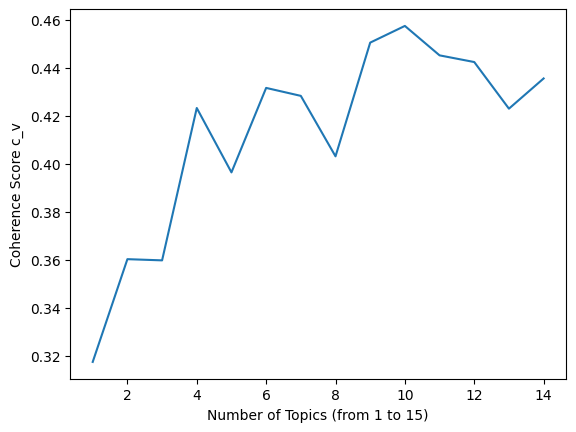

In [89]:
# creating lda object and choosing number of topics
nl_lda_model = LDAModel(nl_df)
nl_lda_model.preprocess(custom_stopwords)  
nl_lda_model.create_bow_model() 
nl_lda_model.plot_optimal_coherent_scores() 

In [90]:
# number of topics = 4 another good example is 6 (or 9) based on the c_v measure
nl_lda_model.create_lda_model(4)

nl_lda_model.format_topics_sentences()
nl_df = nl_lda_model.df
nl_df.head()

INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at 0.25
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 4 topics, 100 passes over the supplied corpus of 981 documents, updating every 8000 documents, evaluating every ~981 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.008*"get" + 0.007*"one" + 0.007*"i" + 0.006*"do" + 0.006*"health" + 0.006*"who" + 0.005*"day" + 0.005*"than" + 0.005*"levels" + 0.005*"about"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.007*"exercise" + 0.007*"do" + 0.006*"protein" + 0.006*"out" + 0.006*"because" + 0.005*"all" + 0.005*"time" + 0.005*"our" + 0.005*"how" + 0.005*"f

INFO:gensim.models.ldamodel:-6.963 per-word bound, 124.8 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.008*"protein" + 0.008*"health" + 0.008*"i" + 0.007*"who" + 0.007*"get" + 0.007*"one" + 0.007*"foods" + 0.006*"than" + 0.006*"what" + 0.006*"day"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.011*"back" + 0.010*"do" + 0.008*"muscles" + 0.007*"exercise" + 0.006*"into" + 0.006*"right" + 0.006*"floor" + 0.006*"fat" + 0.006*"weight" + 0.006*"out"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.013*"estrogen" + 0.011*"sleep" + 0.009*"levels" + 0.009*"symptoms" + 0.009*"during" + 0.008*"help" + 0.006*"hot_flashes" + 0.006*"may" + 0.006*"percent" + 0.006*"exercise"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.010*"day" + 0.009*"into" + 0.007*"recovery" + 0.007*"get" + 0.007*"was" + 0.0

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.009*"protein" + 0.008*"health" + 0.008*"i" + 0.007*"who" + 0.007*"foods" + 0.007*"one" + 0.007*"get" + 0.007*"than" + 0.007*"what" + 0.006*"exercise"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.013*"back" + 0.011*"do" + 0.009*"muscles" + 0.007*"into" + 0.007*"strength" + 0.007*"floor" + 0.007*"right" + 0.007*"down" + 0.006*"sit" + 0.006*"endurance"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.011*"sleep" + 0.010*"levels" + 0.010*"symptoms" + 0.009*"during" + 0.009*"help" + 0.007*"hot_flashes" + 0.006*"may" + 0.006*"hormones" + 0.006*"menopausal"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.009*"recovery" + 0.009*"into" + 0.007*"get" + 0.007*"was" + 0.007*"after" + 0.007*"work" + 0.007*"blood" + 0.006*"out" + 0.006*"all"
INFO:gensim.models.ldamodel:topic diff=0.051372, rho=0.254078
INFO:gensim.models.ldamodel:-6.916 per-word bound, 120.7 perplexity estimate based on a held-out corpus of 981 docume

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.015*"back" + 0.011*"do" + 0.010*"muscles" + 0.008*"strength" + 0.008*"into" + 0.008*"floor" + 0.007*"right" + 0.007*"down" + 0.007*"endurance" + 0.007*"sit"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.011*"sleep" + 0.010*"levels" + 0.010*"symptoms" + 0.009*"help" + 0.009*"during" + 0.007*"hot_flashes" + 0.006*"hormones" + 0.006*"may" + 0.006*"menopausal"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.009*"recovery" + 0.008*"into" + 0.008*"get" + 0.008*"after" + 0.007*"was" + 0.007*"work" + 0.007*"hard" + 0.007*"she's" + 0.006*"out"
INFO:gensim.models.ldamodel:topic diff=0.029484, rho=0.210863
INFO:gensim.models.ldamodel:-6.901 per-word bound, 119.5 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 22, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.010*

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.010*"sleep" + 0.010*"levels" + 0.010*"symptoms" + 0.009*"help" + 0.008*"during" + 0.007*"hot_flashes" + 0.006*"hormones" + 0.006*"may" + 0.006*"menopausal"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.010*"recovery" + 0.008*"into" + 0.008*"get" + 0.008*"after" + 0.007*"hard" + 0.007*"work" + 0.007*"was" + 0.007*"she's" + 0.007*"out"
INFO:gensim.models.ldamodel:topic diff=0.019908, rho=0.184145
INFO:gensim.models.ldamodel:-6.894 per-word bound, 118.9 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 29, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.011*"protein" + 0.008*"health" + 0.008*"i" + 0.008*"exercise" + 0.007*"who" + 0.007*"gut" + 0.007*"what" + 0.007*"foods" + 0.007*"because" + 0.007*"one"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.015*"bac

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.010*"recovery" + 0.008*"into" + 0.008*"after" + 0.008*"get" + 0.008*"hard" + 0.007*"work" + 0.007*"was" + 0.007*"before" + 0.007*"out"
INFO:gensim.models.ldamodel:topic diff=0.014491, rho=0.165543
INFO:gensim.models.ldamodel:-6.889 per-word bound, 118.5 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 36, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"protein" + 0.008*"exercise" + 0.008*"health" + 0.008*"i" + 0.007*"gut" + 0.007*"who" + 0.007*"what" + 0.007*"foods" + 0.007*"because" + 0.006*"than"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.016*"back" + 0.011*"muscles" + 0.011*"do" + 0.009*"strength" + 0.008*"floor" + 0.008*"right" + 0.008*"into" + 0.008*"sit" + 0.008*"endurance" + 0.007*"down"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.010*"

INFO:gensim.models.ldamodel:topic diff=0.010792, rho=0.151636
INFO:gensim.models.ldamodel:-6.885 per-word bound, 118.2 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 43, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"protein" + 0.008*"exercise" + 0.008*"i" + 0.008*"health" + 0.007*"gut" + 0.007*"what" + 0.007*"who" + 0.007*"foods" + 0.007*"because" + 0.006*"than"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.016*"back" + 0.012*"muscles" + 0.011*"do" + 0.009*"strength" + 0.009*"floor" + 0.008*"right" + 0.008*"into" + 0.008*"sit" + 0.007*"down" + 0.007*"endurance"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.010*"symptoms" + 0.010*"sleep" + 0.010*"levels" + 0.009*"help" + 0.008*"during" + 0.007*"hot_flashes" + 0.006*"hormones" + 0.006*"menopausal" + 0.006*"may"
INFO:gensim.models.ldamodel:topic #3 (0.250): 

INFO:gensim.models.ldamulticore:PROGRESS: pass 50, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"protein" + 0.008*"exercise" + 0.008*"i" + 0.007*"health" + 0.007*"gut" + 0.007*"what" + 0.007*"who" + 0.007*"foods" + 0.007*"because" + 0.006*"than"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.017*"back" + 0.012*"muscles" + 0.011*"do" + 0.009*"strength" + 0.009*"floor" + 0.009*"right" + 0.008*"into" + 0.008*"sit" + 0.007*"down" + 0.007*"side"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.010*"symptoms" + 0.010*"levels" + 0.010*"sleep" + 0.009*"help" + 0.008*"during" + 0.007*"hot_flashes" + 0.006*"hormones" + 0.006*"menopausal" + 0.006*"percent"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.010*"recovery" + 0.008*"into" + 0.008*"hard" + 0.008*"after" + 0.008*"get" + 0.007*"work" + 0.007*"before" + 0.007*"was" + 0.007*"out"
INFO:gensim.models.ldamodel:topic diff=0.008214, r

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.017*"back" + 0.012*"muscles" + 0.011*"do" + 0.009*"floor" + 0.009*"strength" + 0.009*"right" + 0.008*"into" + 0.008*"sit" + 0.007*"down" + 0.007*"side"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.010*"symptoms" + 0.010*"levels" + 0.010*"sleep" + 0.009*"help" + 0.008*"during" + 0.007*"hot_flashes" + 0.006*"hormones" + 0.006*"menopausal" + 0.006*"percent"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.010*"recovery" + 0.008*"into" + 0.008*"hard" + 0.008*"after" + 0.008*"get" + 0.007*"work" + 0.007*"before" + 0.007*"down" + 0.007*"out"
INFO:gensim.models.ldamodel:topic diff=0.006596, rho=0.130755
INFO:gensim.models.ldamodel:-6.881 per-word bound, 117.8 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 58, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.010*"symptoms" + 0.010*"levels" + 0.010*"sleep" + 0.009*"help" + 0.008*"during" + 0.007*"hot_flashes" + 0.006*"hormones" + 0.006*"menopausal" + 0.006*"percent"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.010*"recovery" + 0.008*"into" + 0.008*"hard" + 0.008*"get" + 0.008*"after" + 0.007*"work" + 0.007*"before" + 0.007*"down" + 0.007*"out"
INFO:gensim.models.ldamodel:topic diff=0.005367, rho=0.123569
INFO:gensim.models.ldamodel:-6.879 per-word bound, 117.7 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 65, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"protein" + 0.008*"exercise" + 0.008*"i" + 0.007*"gut" + 0.007*"health" + 0.007*"what" + 0.007*"foods" + 0.007*"who" + 0.007*"fat" + 0.006*"because"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.01

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.010*"recovery" + 0.008*"into" + 0.008*"hard" + 0.008*"get" + 0.008*"after" + 0.007*"work" + 0.007*"down" + 0.007*"before" + 0.007*"do"
INFO:gensim.models.ldamodel:topic diff=0.004465, rho=0.117452
INFO:gensim.models.ldamodel:-6.878 per-word bound, 117.6 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 72, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"protein" + 0.008*"exercise" + 0.008*"i" + 0.007*"gut" + 0.007*"health" + 0.007*"what" + 0.007*"foods" + 0.007*"who" + 0.007*"fat" + 0.006*"because"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.017*"back" + 0.013*"muscles" + 0.011*"do" + 0.009*"floor" + 0.009*"right" + 0.009*"strength" + 0.009*"into" + 0.009*"sit" + 0.008*"hips" + 0.008*"side"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.010*"sympto

INFO:gensim.models.ldamodel:topic diff=0.003953, rho=0.112161
INFO:gensim.models.ldamodel:-6.877 per-word bound, 117.5 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 79, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"protein" + 0.008*"exercise" + 0.007*"i" + 0.007*"gut" + 0.007*"health" + 0.007*"what" + 0.007*"foods" + 0.007*"fat" + 0.007*"who" + 0.006*"day"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.018*"back" + 0.013*"muscles" + 0.011*"do" + 0.010*"floor" + 0.009*"right" + 0.009*"strength" + 0.009*"into" + 0.009*"sit" + 0.008*"hips" + 0.008*"side"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.010*"symptoms" + 0.010*"levels" + 0.009*"sleep" + 0.009*"help" + 0.008*"during" + 0.007*"hot_flashes" + 0.006*"menopausal" + 0.006*"hormones" + 0.006*"percent"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*

INFO:gensim.models.ldamulticore:PROGRESS: pass 86, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.012*"protein" + 0.008*"exercise" + 0.007*"gut" + 0.007*"i" + 0.007*"health" + 0.007*"what" + 0.007*"foods" + 0.007*"fat" + 0.007*"who" + 0.007*"day"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.018*"back" + 0.013*"muscles" + 0.010*"do" + 0.010*"floor" + 0.009*"right" + 0.009*"strength" + 0.009*"into" + 0.009*"sit" + 0.008*"hips" + 0.008*"side"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.014*"estrogen" + 0.010*"symptoms" + 0.010*"levels" + 0.009*"sleep" + 0.009*"help" + 0.008*"during" + 0.007*"hot_flashes" + 0.006*"menopausal" + 0.006*"hormones" + 0.006*"percent"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.010*"recovery" + 0.008*"hard" + 0.008*"into" + 0.008*"get" + 0.008*"after" + 0.008*"work" + 0.007*"do" + 0.007*"exercise" + 0.007*"was"
INFO:gensim.models.ldamodel:topic diff=0.003372, rho=0

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.018*"back" + 0.013*"muscles" + 0.010*"do" + 0.010*"floor" + 0.009*"right" + 0.009*"strength" + 0.009*"sit" + 0.009*"into" + 0.008*"hips" + 0.008*"side"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.013*"estrogen" + 0.010*"symptoms" + 0.010*"levels" + 0.009*"sleep" + 0.009*"help" + 0.008*"during" + 0.007*"hot_flashes" + 0.006*"menopausal" + 0.006*"hormones" + 0.006*"percent"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.010*"recovery" + 0.008*"hard" + 0.008*"into" + 0.008*"get" + 0.008*"after" + 0.008*"work" + 0.007*"do" + 0.007*"exercise" + 0.007*"was"
INFO:gensim.models.ldamodel:topic diff=0.003024, rho=0.102874
INFO:gensim.models.ldamodel:-6.875 per-word bound, 117.4 perplexity estimate based on a held-out corpus of 981 documents with 34708 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 94, dispatched chunk #0 = documents up to #981/981, outstanding queue size 1
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.013

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.018*"back" + 0.013*"muscles" + 0.010*"do" + 0.010*"floor" + 0.009*"right" + 0.009*"strength" + 0.009*"sit" + 0.009*"into" + 0.008*"hips" + 0.008*"side"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.013*"estrogen" + 0.010*"symptoms" + 0.010*"levels" + 0.009*"sleep" + 0.009*"help" + 0.008*"during" + 0.007*"hot_flashes" + 0.006*"menopausal" + 0.006*"percent" + 0.006*"hormones"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.012*"day" + 0.010*"recovery" + 0.008*"hard" + 0.008*"into" + 0.008*"get" + 0.008*"after" + 0.008*"work" + 0.007*"do" + 0.007*"exercise" + 0.007*"was"


,index,book,chapter,paragraph_number,paragraph,tokens,processed,dominant_topic,perc_contribution,topic_keywords
0,1157,Next Level,1,1,THE STATS. THE STIGMA. THE SILENCE.How we thin...,"[the, stats, the, stigma, the, silence, how, w...","[how, think, talk, about, matters, life, about...",2,0.9771,"estrogen, symptoms, levels, sleep, help, durin..."
1,1158,Next Level,1,2,"When you look at it that way, it's all the mor...","[when, you, look, at, it, that, way, it's, all...","[look, way, it's, all, how, negative, all, aro...",2,0.6513,"estrogen, symptoms, levels, sleep, help, durin..."
2,1159,Next Level,1,3,The Puritan times weren't much better. If you ...,"[the, puritan, times, weren't, much, better, i...","[times, much, better, through, who, was, find,...",2,0.9699,"estrogen, symptoms, levels, sleep, help, durin..."
3,1160,Next Level,1,4,Menopause finally surfaced as a recognized med...,"[menopause, finally, surfaced, as, a, recogniz...","[finally, medical, s, didn't, improve, was, "",...",2,0.9730,"estrogen, symptoms, levels, sleep, help, durin..."
4,1161,Next Level,1,5,Things didn't really get much better even in w...,"[things, didn't, really, get, much, better, ev...","[things, didn't, really, get, much, better, ev...",2,0.9798,"estrogen, symptoms, levels, sleep, help, durin..."


In [91]:
nl_sentiment_model = Sentiment(nl_df)
nl_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
nl_sentiment_model.df.head()

INFO:root:loading sentiments from already exported file:
	out/sentiment.csv
INFO:root:left join done and sentiments are loaded - check: 981==981?


,index,book,chapter,paragraph_number,paragraph,tokens,processed,dominant_topic,perc_contribution,topic_keywords,sentiment
0,1157,Next Level,1,1,THE STATS. THE STIGMA. THE SILENCE.How we thin...,"[the, stats, the, stigma, the, silence, how, w...","[how, think, talk, about, matters, life, about...",2,0.9771,"estrogen, symptoms, levels, sleep, help, durin...",NEUTRAL
1,1158,Next Level,1,2,"When you look at it that way, it's all the mor...","[when, you, look, at, it, that, way, it's, all...","[look, way, it's, all, how, negative, all, aro...",2,0.6513,"estrogen, symptoms, levels, sleep, help, durin...",NEGATIVE
2,1159,Next Level,1,3,The Puritan times weren't much better. If you ...,"[the, puritan, times, weren't, much, better, i...","[times, much, better, through, who, was, find,...",2,0.9699,"estrogen, symptoms, levels, sleep, help, durin...",NEGATIVE
3,1160,Next Level,1,4,Menopause finally surfaced as a recognized med...,"[menopause, finally, surfaced, as, a, recogniz...","[finally, medical, s, didn't, improve, was, "",...",2,0.9730,"estrogen, symptoms, levels, sleep, help, durin...",NEGATIVE
4,1161,Next Level,1,5,Things didn't really get much better even in w...,"[things, didn't, really, get, much, better, ev...","[things, didn't, really, get, much, better, ev...",2,0.9798,"estrogen, symptoms, levels, sleep, help, durin...",NEGATIVE


In [92]:
nl_sentiment_model.export_to_csv('out/sentiments_nl.csv')

INFO:root:file is writen successfully


In [ ]:
nl_vis = Vis(sentiment=nl_sentiment_model, lda=nl_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

nl_vis.treemap_chapter_topic('figures/nl_chapter_topic.html')  # treemap of chapter -> topics
nl_vis.treemap_topic_sentiment('figures/nl_topic_sentment.html')  # treemap of topics -> sentiments
nl_vis.pyviz_topics('figures/nl_pyvis_topics.html')  # pyVis topic analysis
try:
    nl_vis.generate_topics_wordcloud('figures/nl_wordclouds.svg')
except:
    print('wordcloud cannot be generated.')

INFO:root:chapter-topic treemap html is saved in: 
	figures/nl_chapter_topic.html
INFO:root:topic-sentiment treemap html is saved in: 
	figures/nl_topic_sentment.html


{'(?)': 'lightgrey', '2': '#fd7f6f', '0': '#7eb0d5', '3': '#b2e061', '1': '#bd7ebe'}


INFO:root:pyvis html visualization is saved in: 
	figures/nl_pyvis_topics.html
/Users/ehsanhamzei/opt/anaconda3/envs/lda_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

INFO:root:wordclouds are generated and saved in:	figures/nl_wordclouds.svg


### 3. Queen Menopause

In [ ]:
qm_df = bookshelf.create_corpus_custom_df(qm_book_name)
qm_df = qm_df.reset_index()
qm_df.head()

In [ ]:
# creating lda object and choosing number of topics
qm_lda_model = LDAModel(qm_df)
qm_lda_model.preprocess(custom_stopwords)  
qm_lda_model.create_bow_model() 
qm_lda_model.plot_optimal_coherent_scores() 

In [ ]:
# Apparently same topic :) number of topics = 3
qm_lda_model.create_lda_model(3)

qm_lda_model.format_topics_sentences()
qm_df = qm_lda_model.df
qm_df.head()

In [ ]:
qm_sentiment_model = Sentiment(qm_df)
qm_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
qm_sentiment_model.df.head()

In [ ]:
qm_sentiment_model.export_to_csv('out/sentiments_qm.csv')

In [ ]:
qm_vis = Vis(sentiment=qm_sentiment_model, lda=qm_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

qm_vis.treemap_chapter_topic('figures/qm_chapter_topic.html')  # treemap of chapter -> topics
qm_vis.treemap_topic_sentiment('figures/qm_topic_sentment.html')  # treemap of topics -> sentiments
qm_vis.pyviz_topics('figures/qm_pyvis_topics.html')  # pyVis topic analysis
try:
    qm_vis.generate_topics_wordcloud('figures/qm_wordclouds.svg')
except:
    print('issue in generating wordclouds')

### 4. The Menopause Manifesto

In [ ]:
tmm_df = bookshelf.create_corpus_custom_df(tmm_book_name)
tmm_df = tmm_df.reset_index()
tmm_df.head()

In [ ]:
# creating lda object and choosing number of topics
tmm_lda_model = LDAModel(tmm_df)
tmm_lda_model.preprocess(custom_stopwords)  
tmm_lda_model.create_bow_model() 
tmm_lda_model.plot_optimal_coherent_scores() 


In [ ]:
# number of topics = 3 another good example is 8 based on the c_v measure
tmm_lda_model.create_lda_model(3)

tmm_lda_model.format_topics_sentences()
tmm_df = tmm_lda_model.df
tmm_df.head()


In [ ]:
tmm_sentiment_model = Sentiment(tmm_df)
tmm_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
tmm_sentiment_model.df.head()

In [ ]:
tmm_sentiment_model.export_to_csv('out/sentiments_tmm.csv')

In [ ]:
tmm_vis = Vis(sentiment=tmm_sentiment_model, lda=tmm_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

tmm_vis.treemap_chapter_topic('figures/tmm_chapter_topic.html')  # treemap of chapter -> topics
tmm_vis.treemap_topic_sentiment('figures/tmm_topic_sentment.html')  # treemap of topics -> sentiments
tmm_vis.pyviz_topics('figures/tmm_pyvis_topics.html')  # pyVis topic analysis
try:
    tmm_vis.generate_topics_wordcloud('figures/tmm_wordclouds.svg')
except:
    print('issue in creating wordclouds')

### 5. Menopausing

In [ ]:
m_df = bookshelf.create_corpus_custom_df(m_book_name)
m_df = m_df.reset_index()
m_df.head()

In [ ]:
# creating lda object and choosing number of topics
m_lda_model = LDAModel(m_df)
m_lda_model.preprocess(custom_stopwords)  
m_lda_model.create_bow_model() 
m_lda_model.plot_optimal_coherent_scores() 

In [ ]:
# number of topics = 3 another good example is 5 (or 8) based on the c_v measure
m_lda_model.create_lda_model(3)

m_lda_model.format_topics_sentences()
m_df = m_lda_model.df
m_df.head()

In [ ]:
m_sentiment_model = Sentiment(m_df)
m_sentiment_model.predict(load_from_file=True, file_name='out/sentiment.csv')
m_sentiment_model.df.head()

In [ ]:
m_sentiment_model.export_to_csv('out/sentiments_m.csv')

In [ ]:
m_vis = Vis(sentiment=m_sentiment_model, lda=m_lda_model)
# chapter sentiments already covered in all books in the shelf 
# - no change (sentiments are the same only topics are changed)

m_vis.treemap_chapter_topic('figures/m_chapter_topic.html')  # treemap of chapter -> topics
m_vis.treemap_topic_sentiment('figures/m_topic_sentment.html')  # treemap of topics -> sentiments
m_vis.pyviz_topics('figures/m_pyvis_topics.html')  # pyVis topic analysis
try:
    m_vis.generate_topics_wordcloud('figures/m_wordclouds.svg')
except:
    print('issue in creating wordclouds')

In [ ]:
### TESTING - remove this later :)